# 数据处理

In [13]:
# 数据预处理——————————————————————————

# 导入要分析的 dataset
import pandas as pd
posts_df = pd.read_csv('Weibo_rumors2.csv')
posts_df.iloc[12]

Unnamed: 0                                                           12
rumor                                                              True
text                  家乐福发生突发事件，营业时间所有出入口用铁门封闭，不许进出，原因是一女士在结账时跟在身边的孩...
has_url                                                           False
comments                                                             72
pics                                                                  0
source                                                             微博桌面
likes                                                                 0
time                                     Thu Dec 13 16:35:31 +0800 2012
reposts                                                             585
pid                                                          2687581863
user_verified                                                     False
user_description                                                  False
user_gender                                                     

In [14]:
# 建立情感词典 ---------------------
import pandas as pd
dic_df=pd.read_csv('Chinese_emotion_dictionary.csv')
senti_dic = {}
for i in range(dic_df.shape[0]):
    sentiment = dic_df.iloc[i]['sentiment']
    senti_words = dic_df.iloc[i]['word']
    if sentiment in senti_dic:
        senti_dic[sentiment].append(senti_words)
    else:
        senti_dic[sentiment] = [senti_words]
#senti_dic

In [15]:
# 中文 data cleaning text
import re
def data_cleaning(text):
    text=text.lower()
    text=re.sub('[0-9]+','',text)
    text=re.sub('@[^ ]+','',text)
    text=re.sub('#([^#]+)#','',text) #直接使用“#[^ ]+”后，发现有的post被全部删掉，所以做了修正
    text=re.sub('https:[^ ]+','',text)
    text=re.sub('展开c','',text) #删去没用的词
    text=re.sub('全文c','',text) #删去没用的词
    text=re.sub('[\W]+',' ',text)
    text=text.strip()
    return(text)
    
# 2 tokenization
import jieba
jieba.set_dictionary('dict.txt.big.txt')
# 增加情绪词典到jieba的用户词典中
for sentiment in senti_dic:
    for word in senti_dic[sentiment]:
        jieba.add_word(word)

# 3 remove stopwords
file_chi=open('stop_words_chi.txt','r',encoding='utf-8')
stopwords=[i.strip() for i in file_chi.readlines()]

def remove_stopwords(words):
    global stopwords
    stopwords.append(' ')
    words_rm=[]
    for word in words:
        if word not in stopwords:
            words_rm.append(word)
    return(words_rm)

<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
/var/folders/91/kzhfgz3j4f98wrxkb28bfv_c0000gn/T/ipykernel_57035/3239699793.py:11: SyntaxWarning: invalid escape sequence '\W'
  text=re.sub('[\W]+',' ',text)
Building prefix dict from /Users/zhimeilin/Desktop/G1 - final - ZHI/dict.txt.big.txt ...
Loading model from cache /var/folders/91/kzhfgz3j4f98wrxkb28bfv_c0000gn/T/jieba.ucbbb389b9da6166ad202fffb3732f451.cache
Loading model cost 0.718 seconds.
Prefix dict has been built successfully.


In [16]:
#尝试清理
# 从CSV提取posts_text
posts_text = posts_df['text']
#type(posts_text)

In [17]:
post_1 = posts_text.iloc[12]
text_clean=data_cleaning(post_1)
words = list(jieba.cut(text_clean))
words_rm=remove_stopwords(words)

In [18]:
#words_rm

In [19]:
# 正式清理遍历每行--------------
for i in range(posts_df.shape[0]):
    post = posts_df.iloc[i]['text']
    text_clean=data_cleaning(post)
    words = list(jieba.cut(text_clean))
    words_rm=remove_stopwords(words)
    #存在一个新列中
    posts_df.loc[i, 'text_cleaned'] = ' '.join(words_rm) 

In [20]:
posts_df.iloc[16]['text_cleaned']

'转发 帮忙 转 一下 一名 北京 三中 学生 谢露 岁 消失 几天 爸爸 号码 爱心 接力 好友 帮 忙 转下 必有 报 转发'

In [21]:
posts_df.head()

Unnamed: 0  rumor                                               text  \
0           0   True  人间惨剧：今天下午约14点，宁波妇儿医院，一妇女携带一婴儿在住院楼跳楼，后抢救无效死亡。具体...   
1           1   True  再去武大，已无牌坊！非要拆掉？@章立凡 @袁裕来律师 @老徐时评 @徐昕 @杨锦麟 @左小祖...   
2           2   True  中国最美丽的乡村"江西婺源"一"教师打死学生" 昨晚，在被誉为中国最美丽的乡村江西省婺源县清...   
3           3   True  忍者QS：江苏省东海县女镇党委书记徐艳，因不愿陪县委书记关永健上床，竟然被警察毒打致子宫破裂...   
4           4   True  《北大猛男，持刀刺官！！！》“可歌可泣”的是王同学投案自首之后冷冷说了一句话是 “我并不后悔...   

   has_url  comments  pics        source  likes  \
0    False        55     1  微博 weibo.com      0   
1    False       170     1  微博 weibo.com      0   
2     True       466     0            微吧      0   
3     True        15     0  微博 weibo.com      6   
4    False        78     1      360安全浏览器     11   

                             time  reposts  ...  user_verified  \
0  Tue Sep 11 11:34:22 +0800 2012      225  ...          False   
1  Tue Oct 09 15:44:54 +0800 2012      395  ...          False   
2  Wed Mar 13 11:55:24 +0800 2013      685  ...          False   
3  Sat Oct 05 19:17:42 +0800 2013      120  ...          False   
4  Thu May 09 13:46:10 +0800 2013      532  ...          False   

   user_description  user_gender user_messages  user_followers  user_location  \
0              True            f          5653          227833             上海   
1             False            m         11882           59624             其他   
2              True            m            76              66          江西 上饶   
3              True            m         22989            8358          吉林 吉林   
4              True            f          2911            1096        新疆 巴音郭楞   

    user_time  user_friends  user_verified_type  \
0  1312112304           907                  -1   
1  1302581825          1923                  -1   
2  1318493987            82                  -1   
3  1297253360          1474                  -1   
4  1355300133          1118                  -1   

                                        text_cleaned  
0  人间 惨剧 今天下午 约点 宁波 妇儿 医院 妇女 携带 婴儿 住院楼 跳楼 抢救无效 死亡...  
1                                         武大 牌坊 非 拆掉  
2  中国 美丽 乡村 江西 婺源 教师 打死 学生 昨晚 被誉为 中国 美丽 乡村 江西省 婺源...  
3  忍者 qs 江苏省 东海县 女镇 党委书记 徐艳 因不愿 陪 县委书记 关永健 上床 竟然 ...  
4  北大 猛男 持刀 刺官 可歌可泣 王 同学 投案自首 之后 冷冷 说 一句 话 后悔 不让 ...  

[5 rows x 21 columns]

# Task 1 rumor post情感分析 - 情绪值与情感极性

## Q1:rumor帖子的情绪主要是什么？

In [22]:
#——1.1计算所有帖子中，各种情绪的情绪词个数总和
#———————可视化：饼图、柱状图、面积图
#——————————目标：宏观上查看rumor帖子中，哪种情绪更多（'Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry'）

In [23]:
# 新增列
for sentiment in senti_dic.keys():
    posts_df[sentiment] = 0
# 写入sample
for i in range(posts_df.shape[0]):
    post_cleaned = posts_df.iloc[i]['text_cleaned']
    for sentiment in senti_dic.keys():
        count = 0
        for keyword in senti_dic[sentiment]:
            count += post_cleaned.count(keyword)
        posts_df.loc[i, sentiment] = count

In [24]:
#计算population
# 选中需要计算的列
senti_col = ['text_cleaned','Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']
# 计算
senti_col_sums = posts_df[senti_col].sum()
type(senti_col_sums)

pandas.core.series.Series

In [25]:
sentiments = ['Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']
sentiments_results = posts_df[sentiments].sum()
max_senti = sentiments_results.idxmax()
print(sentiments_results,'\n','the most mentioned emotion is ',max_senti)

Disgust     3404
Awe         6045
Joy         1809
Sadness     1135
Fear         655
Surprise     246
Angry        122
dtype: int64 
 the most mentioned emotion is  Awe


In [26]:
# 加入了7个情绪的个数
# posts_df.head()

In [27]:
#饼图、柱状图，直观体现
import matplotlib.pyplot as plt
# 设置标签和数据
labels = ['Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']
data = senti_col_sums[1:]  # 从第二个元素开始，跳过'text_cleaned'列

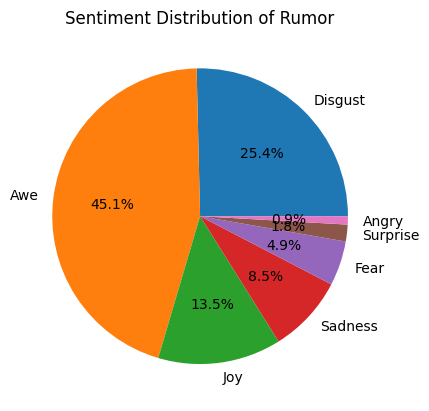

In [28]:
# 绘制饼图
plt.pie(data, labels=labels, autopct='%1.1f%%')
# 添加标题
plt.title('Sentiment Distribution of Rumor')
# 显示图形
plt.show()

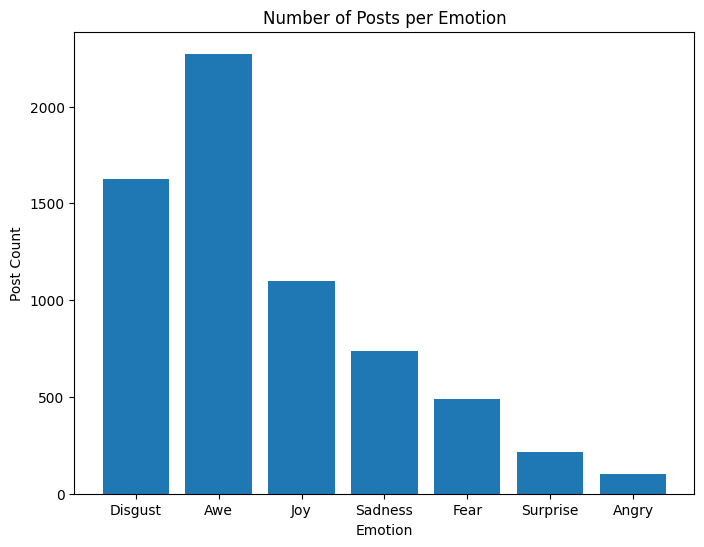

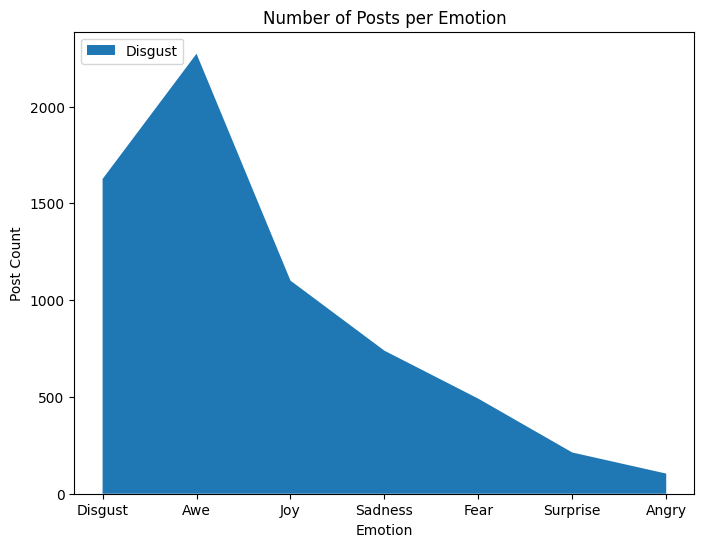

In [29]:
import matplotlib.pyplot as plt

senti_col = ['Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']
count_posts = []

for sentiment in senti_col:
    posts = posts_df[posts_df[sentiment] > 0]
    count = len(posts)
    count_posts.append(count)

# 柱状图
plt.figure(figsize=(8, 6))
plt.bar(senti_col, count_posts)
plt.xlabel('Emotion')
plt.ylabel('Post Count')
plt.title('Number of Posts per Emotion')
plt.show()

# 面积图
plt.figure(figsize=(8, 6))
plt.stackplot(senti_col, count_posts, labels=senti_col)
plt.xlabel('Emotion')
plt.ylabel('Post Count')
plt.title('Number of Posts per Emotion')
plt.legend(loc='upper left')
plt.show()

In [30]:
##### Q1:rumor帖子的情绪主要是什么？--------------------------------------------
#——任务：计算所有帖子中，各种情绪的情绪词个数总和
#—————可视化：饼图、柱状图、面积图
#—————————目标：宏观上查看rumor帖子中，哪种情绪更多（'Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry'）
#——【结论】————
# AWE>disgust>joy

## Q2:不同情绪下有哪些关键词？

In [31]:
#——任务：提取各种情绪涉及的词语
#—————可视化：词云

In [32]:
# 制作一个dictionary,key是情绪类别，value是post出现的对应的词
## 再历遍dictionary，制作词云图、矩阵
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [33]:
a = posts_df['text_cleaned'].iloc[1]
type(a)

str

In [34]:
# 制作一个dictionary，key是情绪类别，value是post出现的对应的词
senti_word = {}
for sentiment in senti_dic.keys():
    senti_word[sentiment] = []

for post in posts_df['text_cleaned']:
    words = post.split()  # 每个帖子以空格分隔词语
    for word in words:
        for sentiment in senti_dic.keys():
            if word in senti_dic[sentiment]:
                senti_word[sentiment].append(word)

In [35]:
senti_word

{'Disgust': ['昂贵',
  '死地',
  '毒打',
  '破裂',
  '贪污',
  '贪污',
  '受贿',
  '冷冷',
  '拐卖',
  '敏感',
  '人贩子',
  '团伙',
  '疯了',
  '崩溃',
  '严重',
  '无耻',
  '肆无忌惮',
  '诈骗',
  '抢劫',
  '挥霍',
  '明目张胆',
  '贪污',
  '视而不见',
  '贪婪',
  '乌龟',
  '严重',
  '失业',
  '阉割',
  '闹事',
  '殴打',
  '失职',
  '强行',
  '近视',
  '哄抢',
  '内幕',
  '色情',
  '饭桶',
  '色情',
  '勒索',
  '严重',
  '阴影',
  '黑心',
  '施暴',
  '污染',
  '污染',
  '事故',
  '事故',
  '揭露',
  '装b',
  '恶心',
  '虚伪',
  '霸气',
  '强奸',
  '强奸',
  '强奸',
  '过失',
  '强奸',
  '国耻',
  '随便',
  '笑话',
  '小动作',
  '蛀虫',
  '讽刺',
  '贫穷',
  '致使',
  '疯了',
  '痛恨',
  '阻碍',
  '阉割',
  '阉割',
  '拐卖',
  '麻烦',
  '落马',
  '情妇',
  '调戏',
  '异味',
  '破口大骂',
  '屠夫',
  '找茬儿',
  '欺负',
  '逼迫',
  '吸毒',
  '逼迫',
  '吸毒',
  '威胁',
  '一丝不挂',
  '诈骗',
  '骗子',
  '阉割',
  '阉割',
  '炫耀',
  '杀害',
  '情妇',
  '作死',
  '虐待',
  '官官相护',
  '屠夫',
  '恶人',
  '恶人',
  '背后',
  '抄袭',
  '舞弊',
  '反感',
  '骗人',
  '情绪',
  '子虚',
  '黑帮',
  '帝王',
  '偷情',
  '疯了',
  '团伙',
  '迫降',
  '好人',
  '疯了',
  '尴尬',
  '疯了',
  '贫穷',
  '情绪',
  '威胁',
  '危机',
  '粉饰',
  '揭露'

In [36]:
# 统计词频，形成频率矩阵
freq_matrix = {}
for sentiment in senti_word:
    freq_dict = {}
    for word in senti_word[sentiment]:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1
        # 将频率矩阵中的空格子填写为0
    for word in senti_dic[sentiment]:
        if word not in freq_dict:
            freq_dict[word] = 0
    freq_matrix[sentiment] = freq_dict
    freq_matrix[sentiment] = freq_dict

In [37]:
freq_matrix

{'Disgust': {'昂贵': 4,
  '死地': 2,
  '毒打': 5,
  '破裂': 3,
  '贪污': 13,
  '受贿': 6,
  '冷冷': 2,
  '拐卖': 13,
  '敏感': 15,
  '人贩子': 13,
  '团伙': 12,
  '疯了': 24,
  '崩溃': 13,
  '严重': 45,
  '无耻': 15,
  '肆无忌惮': 4,
  '诈骗': 4,
  '抢劫': 4,
  '挥霍': 2,
  '明目张胆': 2,
  '视而不见': 2,
  '贪婪': 4,
  '乌龟': 6,
  '失业': 3,
  '阉割': 22,
  '闹事': 2,
  '殴打': 16,
  '失职': 7,
  '强行': 6,
  '近视': 2,
  '哄抢': 7,
  '内幕': 18,
  '色情': 3,
  '饭桶': 1,
  '勒索': 1,
  '阴影': 4,
  '黑心': 7,
  '施暴': 2,
  '污染': 19,
  '事故': 11,
  '揭露': 17,
  '装b': 1,
  '恶心': 9,
  '虚伪': 4,
  '霸气': 8,
  '强奸': 31,
  '过失': 6,
  '国耻': 13,
  '随便': 9,
  '笑话': 5,
  '小动作': 4,
  '蛀虫': 6,
  '讽刺': 5,
  '贫穷': 5,
  '致使': 7,
  '痛恨': 1,
  '阻碍': 6,
  '麻烦': 15,
  '落马': 2,
  '情妇': 10,
  '调戏': 2,
  '异味': 2,
  '破口大骂': 1,
  '屠夫': 3,
  '找茬儿': 1,
  '欺负': 5,
  '逼迫': 5,
  '吸毒': 5,
  '威胁': 8,
  '一丝不挂': 1,
  '骗子': 9,
  '炫耀': 4,
  '杀害': 8,
  '作死': 2,
  '虐待': 3,
  '官官相护': 2,
  '恶人': 3,
  '背后': 15,
  '抄袭': 11,
  '舞弊': 1,
  '反感': 2,
  '骗人': 2,
  '情绪': 11,
  '子虚': 1,
  '黑帮': 2,
  '帝王': 7,
  '偷情'

In [38]:
 # 后续用于gephi绘图！！！！！
import pandas as pd
# 将 freq_matrix 转换为 DataFrame
freq_df = pd.DataFrame(freq_matrix)
# 保存为 Excel 文件
output_file = 'co-occurrence_matrix.csv'
freq_df.to_csv(output_file, index=True)

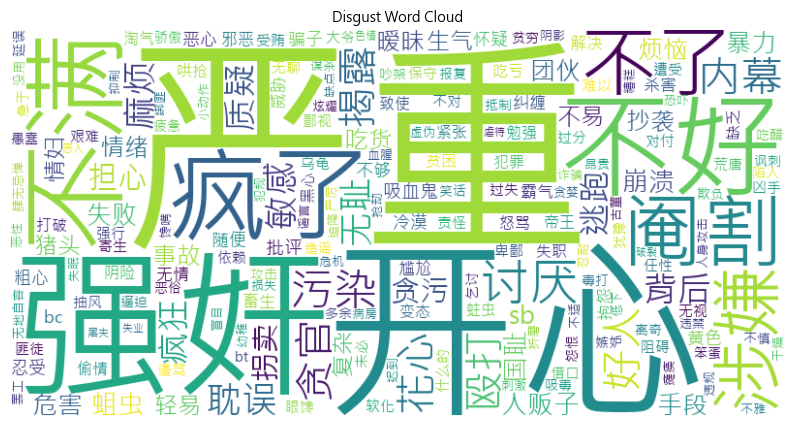

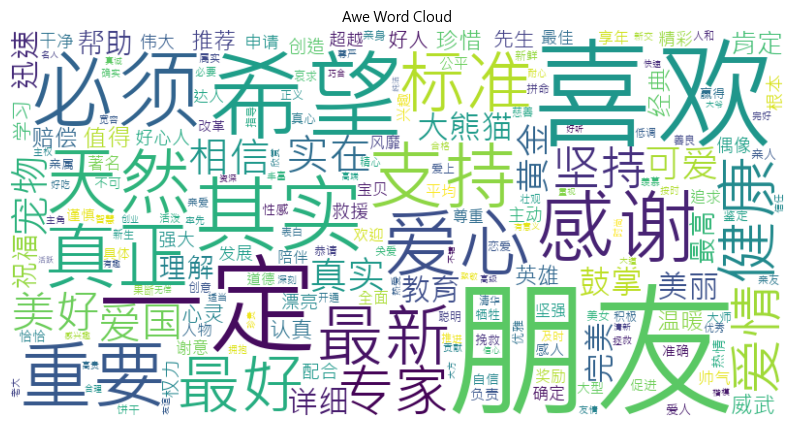

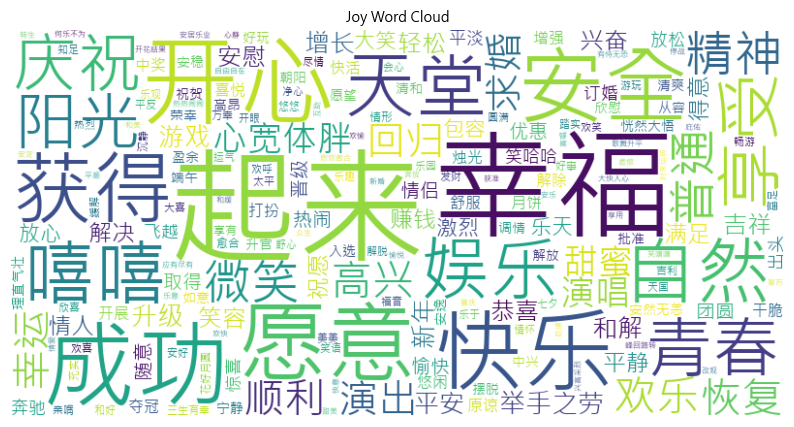

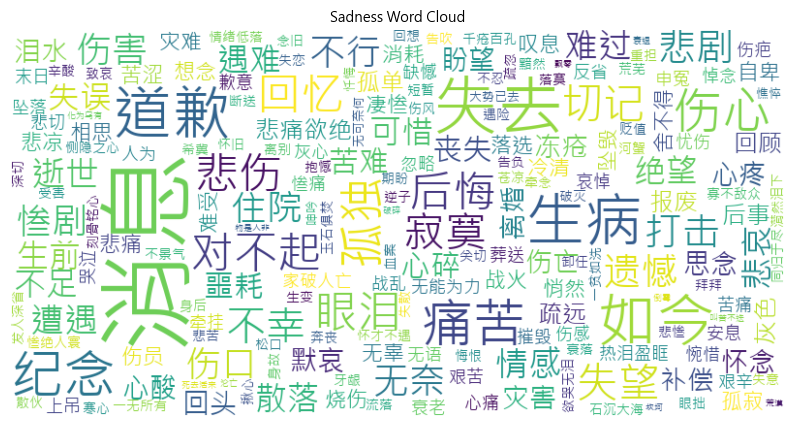

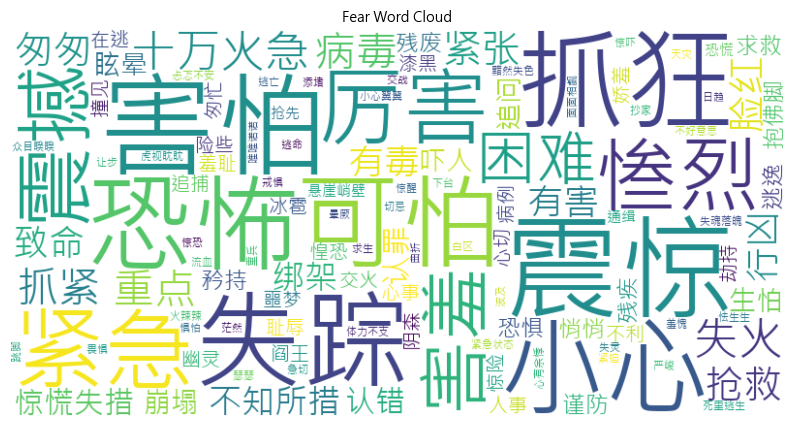

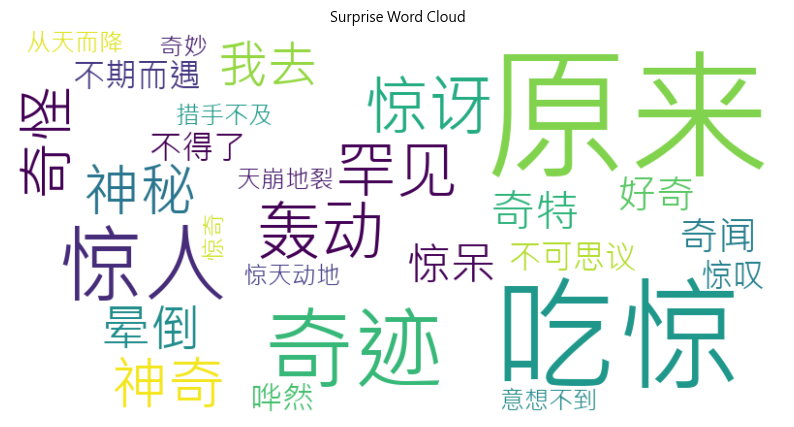

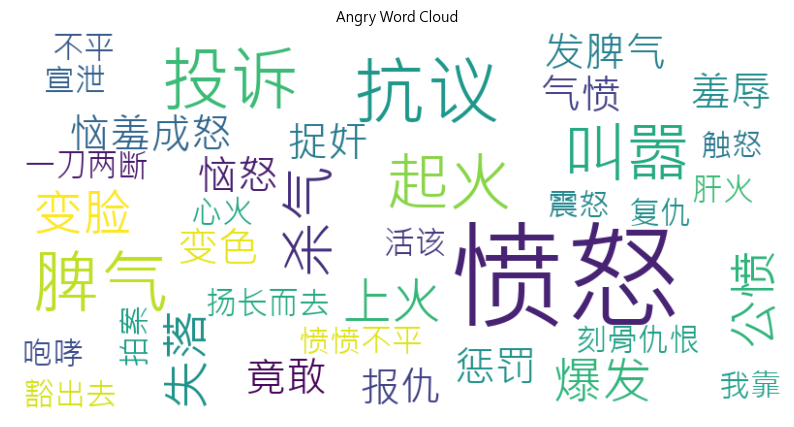

In [39]:
# 制作各情绪类别的词云图
import matplotlib.font_manager as fm
import matplotlib.font_manager as fm

# 指定中文字体
font_path = '/Users/zhimeilin/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/Microsoft JhengHei/41226721888.ttf'  # 替换为你的字体文件路径
font_prop = fm.FontProperties(fname=font_path)

# 制作各情绪类别的词云图
for sentiment in freq_matrix:
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(freq_matrix[sentiment])
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(sentiment + ' Word Cloud', fontproperties=font_prop)  # 使用本苹果电脑指定字体，如果合并，需要检查字体地址！！！
    plt.show()

In [40]:
##### Q1:rumor帖子的情绪主要是什么？----------------------------------------
#——任务：计算所有帖子中，各种情绪的情绪词个数总和
#—————可视化：饼图、柱状图、面积图
#—————————目标：宏观上查看rumor帖子中，哪种情绪更多（'Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry'）
#——【结论】————
# AWE>disgust>joy

In [41]:
##### Q2:不同情绪下有哪些关键词？--------------------------------------------
#——任务：提取各种情绪涉及的词语
#—————可视化：词云、gephi共现
#—————————目标：查看rumor帖子的文本情绪特征，不同情绪使用了哪些情绪词
#——【结论】————
# 各情绪的用词如词云图所示。将结合其他结果进一步分析！！！！！

## Q3:不同的情绪类别（7种类别），引发不同的share、comment、like的倾向

In [42]:
#—————————目标：为了使不同情绪具有可比性，mentioned times作为权重，并计算每种互动的加权平均值。
#——————————情绪值计算方法的备注

In [43]:
sentiments = ['Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']
sentiment_averages_mentioned = {}

for sentiment in sentiments:
    mask = posts_df[sentiment] > 0
    avg_comments = posts_df.loc[mask, 'comments'].mean()
    avg_shares = posts_df.loc[mask, 'reposts'].mean()
    avg_likes = posts_df.loc[mask, 'likes'].mean()
    mentioned_times = posts_df[sentiment].sum()

    sentiment_averages_mentioned[sentiment] = {
        'Mentioned times':mentioned_times,
        'Avg Comments': avg_comments,
        'Avg Shares': avg_shares,
        'Avg Likes': avg_likes,
    }
pop_df = pd.DataFrame.from_dict(sentiment_averages_mentioned, orient='index')
pop_df.index.name = 'Sentiments'
pop_df = pop_df.sort_values(by='Mentioned times', ascending=False)

pop_df


Mentioned times  Avg Comments  Avg Shares  Avg Likes
Sentiments                                                      
Awe                    6045    155.761989  414.839859  43.748790
Disgust                3404    143.190652  408.178967  34.569496
Joy                    1809    171.083560  416.267938  57.841054
Sadness                1135    154.691475  426.442490  38.894452
Fear                    655    125.816701  393.716904  27.798371
Surprise                246    147.187793  394.347418  38.075117
Angry                   122    128.615385  447.173077  16.182692

In [44]:
# Calculate the weighted averages using a loop
tobe_weighted_columns = ['Comments', 'Shares', 'Likes']
for column in tobe_weighted_columns:
    pop_df['Weighted Avg ' + column] = pop_df['Avg ' + column] * pop_df['Mentioned times']
    pop_df['Weighted Avg ' + column] /= pop_df['Mentioned times'].sum()
    
weighted_columns = ['Weighted Avg Comments', 'Weighted Avg Shares', 'Weighted Avg Likes']
pop_df_weighted = pop_df[weighted_columns]

pop_df_weighted

Weighted Avg Comments  Weighted Avg Shares  Weighted Avg Likes
Sentiments                                                                
Awe                     70.183454           186.919123           19.712391
Disgust                 36.331319           103.565981            8.771211
Joy                     23.068736            56.129152            7.799230
Sadness                 13.086973            36.077238            3.290489
Fear                     6.142661            19.222165            1.357180
Surprise                 2.698882             7.230878            0.698157
Angry                    1.169579             4.066422            0.147159

In [45]:
##### Q3:不同的情绪类别（7种类别），引发不同的share、comment、like的倾向--------------------------------------------
#——任务：
#—————可视化：
#—————————目标：为了使不同情绪具有可比性，mentioned times作为权重，并计算每种互动的加权平均值。
#——————————计算方法备注：sum(average_each * mentioned_times_each)/sum(mentioned_times_total)
#——【结论】————
# 通过结果的比较，比较明显的结果是：发现rumor帖子中的Awe，joy情绪元素最容易得到用户的互动，其中最容易被转发。

## Q4:【假设检验】同的情绪极性（积极+、消极-），引发不同的share、comment、like的倾向

In [46]:
#——任务：不同情绪 和 用户互动行为的 相关性
#—————可视化：计算 person r 
#—————————目标：为了使不同情绪具有可比性，mentioned times作为权重，并计算每种“情绪”的加权平均值。
#——————————计算方法备注：sum(specific_senti-word_times * intensity * valence) / total_senti-word_times

In [47]:
selected_columns = ['text_cleaned', 'Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']
extracted_df = posts_df[selected_columns].copy()
extracted_df

text_cleaned  Disgust  Awe  Joy  \
0     人间 惨剧 今天下午 约点 宁波 妇儿 医院 妇女 携带 婴儿 住院楼 跳楼 抢救无效 死亡...        2    1    0   
1                                            武大 牌坊 非 拆掉        0    0    0   
2     中国 美丽 乡村 江西 婺源 教师 打死 学生 昨晚 被誉为 中国 美丽 乡村 江西省 婺源...        2    6    0   
3     忍者 qs 江苏省 东海县 女镇 党委书记 徐艳 因不愿 陪 县委书记 关永健 上床 竟然 ...        5    0    0   
4     北大 猛男 持刀 刺官 可歌可泣 王 同学 投案自首 之后 冷冷 说 一句 话 后悔 不让 ...        1    2    0   
...                                                 ...      ...  ...  ...   
3295  日 洛阳 一名 约 岁 裸女 站 一辆 法院 车上 大喊 苍天 引发 市民 围观 据说 女子...        4    3    0   
3296  这是 著名 云南 怒江 傈僳族 女孩 飞索 渡江 求学 每年 十几个 孩子 掉 进 滚滚 怒...        2    1    0   
3297                            这是 一对 父子 合影 真实 中国 社会 写照        0    1    0   
3298                        两 军舰 日本海军 交火 不知 杜撰 确切 消息 by        0    0    0   
3299  新华网 性贿赂 史上 最美 高官 情妇 卢嘉丽 卢嘉丽 年 江苏 镇江人 化名 真实 姓名 ...        7    2    0   

      Sadness  Fear  Surprise  Angry  
0           2     1         0      0  
1           0     0         0      0  
2           1     1         0      0  
3           1     0         0      0  
4           1     0         0      0  
...       ...   ...       ...    ...  
3295        2     1         0      0  
3296        0     0         0      0  
3297        0     0         0      0  
3298        1     1         0      0  
3299        0     1         0      0  

[3300 rows x 8 columns]

In [48]:
ev_df = extracted_df #将会把emotion value存入这个data frame
# 定义情绪列的列表
sentiment_columns = ['Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']

# 定义计算情绪出现次数的函数
def count_sentiments(row):
    # 获取除了 'text_cleaned' 列外的情绪列
    sentiments = row[sentiment_columns]
    # 计算情绪出现的次数
    count = sentiments.sum()
    return count

# 使用 apply 和 count_sentiments 函数对每行进行操作，计算情绪出现次数，并将结果添加为新列 'Sentiment_Count'
ev_df['total_times'] = ev_df.apply(count_sentiments, axis=1)

# 显示更新后的 DataFrame
ev_df

text_cleaned  Disgust  Awe  Joy  \
0     人间 惨剧 今天下午 约点 宁波 妇儿 医院 妇女 携带 婴儿 住院楼 跳楼 抢救无效 死亡...        2    1    0   
1                                            武大 牌坊 非 拆掉        0    0    0   
2     中国 美丽 乡村 江西 婺源 教师 打死 学生 昨晚 被誉为 中国 美丽 乡村 江西省 婺源...        2    6    0   
3     忍者 qs 江苏省 东海县 女镇 党委书记 徐艳 因不愿 陪 县委书记 关永健 上床 竟然 ...        5    0    0   
4     北大 猛男 持刀 刺官 可歌可泣 王 同学 投案自首 之后 冷冷 说 一句 话 后悔 不让 ...        1    2    0   
...                                                 ...      ...  ...  ...   
3295  日 洛阳 一名 约 岁 裸女 站 一辆 法院 车上 大喊 苍天 引发 市民 围观 据说 女子...        4    3    0   
3296  这是 著名 云南 怒江 傈僳族 女孩 飞索 渡江 求学 每年 十几个 孩子 掉 进 滚滚 怒...        2    1    0   
3297                            这是 一对 父子 合影 真实 中国 社会 写照        0    1    0   
3298                        两 军舰 日本海军 交火 不知 杜撰 确切 消息 by        0    0    0   
3299  新华网 性贿赂 史上 最美 高官 情妇 卢嘉丽 卢嘉丽 年 江苏 镇江人 化名 真实 姓名 ...        7    2    0   

      Sadness  Fear  Surprise  Angry  total_times  
0           2     1         0      0            6  
1           0     0         0      0            0  
2           1     1         0      0           10  
3           1     0         0      0            6  
4           1     0         0      0            4  
...       ...   ...       ...    ...          ...  
3295        2     1         0      0           10  
3296        0     0         0      0            3  
3297        0     0         0      0            1  
3298        1     1         0      0            2  
3299        0     1         0      0           10  

[3300 rows x 9 columns]

In [49]:
# 计算每个帖子的emotion value--------------------------------------------------
# 读取情绪词典
emotion_table = pd.read_csv('Chinese_emotion_dictionary.csv')

# 计算每个post/row的情绪值 - 加权平均：sum(specific_word_times * intensity * valence) / total_times
def calculate_emotion_value(post_words):
    emotion_values_word = []
    total_emotion_words = 0  # 情绪词总数

    # 遍历post中的词语
    for word in post_words:
        if word in emotion_table['word'].values:
            # 如果 word 是含有情绪的词
            matching_row = emotion_table[emotion_table['word'] == word]
            # 提取对应 word的 intensity和 valence
            intensity = matching_row['intensity'].values[0]
            valence = matching_row['valence'].values[0]
            word_emotion_value = intensity * valence
            emotion_values_word.append(word_emotion_value)
            total_emotion_words += 1

    # 计算加权平均情绪值
    if total_emotion_words > 0:
        weighted_emotion_value = sum(emotion_values_word) / total_emotion_words
    else:
        weighted_emotion_value = 0

    return weighted_emotion_value

# 遍历每行
for i in range(ev_df.shape[0]):
    post_words = ev_df.iloc[i]['text_cleaned'].split()

    emotion_value = calculate_emotion_value(post_words)

    ev_df.at[i, 'weighted_emotion_value'] = emotion_value

# 显示更新后的 DataFrame
ev_df

text_cleaned  Disgust  Awe  Joy  \
0     人间 惨剧 今天下午 约点 宁波 妇儿 医院 妇女 携带 婴儿 住院楼 跳楼 抢救无效 死亡...        2    1    0   
1                                            武大 牌坊 非 拆掉        0    0    0   
2     中国 美丽 乡村 江西 婺源 教师 打死 学生 昨晚 被誉为 中国 美丽 乡村 江西省 婺源...        2    6    0   
3     忍者 qs 江苏省 东海县 女镇 党委书记 徐艳 因不愿 陪 县委书记 关永健 上床 竟然 ...        5    0    0   
4     北大 猛男 持刀 刺官 可歌可泣 王 同学 投案自首 之后 冷冷 说 一句 话 后悔 不让 ...        1    2    0   
...                                                 ...      ...  ...  ...   
3295  日 洛阳 一名 约 岁 裸女 站 一辆 法院 车上 大喊 苍天 引发 市民 围观 据说 女子...        4    3    0   
3296  这是 著名 云南 怒江 傈僳族 女孩 飞索 渡江 求学 每年 十几个 孩子 掉 进 滚滚 怒...        2    1    0   
3297                            这是 一对 父子 合影 真实 中国 社会 写照        0    1    0   
3298                        两 军舰 日本海军 交火 不知 杜撰 确切 消息 by        0    0    0   
3299  新华网 性贿赂 史上 最美 高官 情妇 卢嘉丽 卢嘉丽 年 江苏 镇江人 化名 真实 姓名 ...        7    2    0   

      Sadness  Fear  Surprise  Angry  total_times  weighted_emotion_value  
0           2     1         0      0            6                0.000000  
1           0     0         0      0            0                0.000000  
2           1     1         0      0           10                1.000000  
3           1     0         0      0            6               -5.800000  
4           1     0         0      0            4                2.250000  
...       ...   ...       ...    ...          ...                     ...  
3295        2     1         0      0           10                0.444444  
3296        0     0         0      0            3                1.500000  
3297        0     0         0      0            1                3.000000  
3298        1     1         0      0            2                0.000000  
3299        0     1         0      0           10               -1.500000  

[3300 rows x 10 columns]

In [50]:
# 合并信息，根据weighted_emotion_value列进行排序
merged_df = pd.concat([posts_df[['text','comments', 'reposts', 'likes']], ev_df['weighted_emotion_value']], axis=1)
merged_df.sort_values('weighted_emotion_value', ascending=False)

text  comments  reposts  \
282   【2013年新版驾驶扣分规则详解图[话筒]】2013年新版驾驶扣分规则详解图~转给司机朋友们...        53      876   
1508              【交通新规】2013年1月1日交通新规就要正式实行了，开车的朋友看过来！！        81      653   
432   吃榴莲后，喝可口可乐，毒过眼镜蛇！ 又一游客，客死泰国异乡！ 一位中国游客在泰国旅游的时候，...        65      438   
2339           2013年新假币…………速速转发你身边的朋友，让他们别上当了。。。@江宁公安在线        18      141   
727   据说这是广东经典名菜：三叫。刚出生的老鼠仔，直接生吃！当筷子夹起来的时候老鼠仔会叫一声；沾酒...        35      139   
...                                                 ...       ...      ...   
165                                          坐等被删，验证无耻。        83      152   
3104                         爱尔兰某航空公司刚公布的新LOGO，我瞬间就邪恶了~        77      237   
374          北京出了这号畜生，百度车牌前仨字自动出来了。 http://t.cn/zTPVuz4        40      233   
3097  据爆料，给留几手、郑渊洁、何润东等每人10万元让他们在同一时间发微博黑苹果品牌的某公关公司受...        35      198   
2161  #晚安汪東城#今天北京接機的高清大圖免費放送咯，給東東海們睡前飽眼福[阴险][阴险][阴险]...        37      190   

      likes  weighted_emotion_value  
282       4                     9.0  
1508      0                     9.0  
432       0                     9.0  
2339      0                     9.0  
727       0                     9.0  
...     ...                     ...  
165       5                    -9.0  
3104      4                    -9.0  
374       2                    -9.0  
3097      2                    -9.0  
2161     61                    -9.0  

[3300 rows x 5 columns]

In [51]:
# crrelation
# 【假设】H1:weighted_emotion_value越高（情绪越积极），
#（h1a）comments，（h1b）shares，（h1c）likes越多.

In [52]:
# 看是correlation的值以及是否显著 ---------------------------------------
from scipy import stats
from scipy.stats import pearsonr

# 计算r和P值
correlation_comments, p_value_comments = pearsonr(merged_df['weighted_emotion_value'], merged_df['comments'])
correlation_shares, p_value_shares = pearsonr(merged_df['weighted_emotion_value'], merged_df['reposts'])
correlation_likes, p_value_likes = pearsonr(merged_df['weighted_emotion_value'], merged_df['likes'])

# 显示结果
result_df = pd.DataFrame(columns=['Correlation', 'P-value'], index=['comments', 'reposts', 'likes'])
result_df.loc['comments', 'Correlation'] = correlation_comments
result_df.loc['comments', 'P-value'] = p_value_comments
result_df.loc['reposts', 'Correlation'] = correlation_shares
result_df.loc['reposts', 'P-value'] = p_value_shares
result_df.loc['likes', 'Correlation'] = correlation_likes
result_df.loc['likes', 'P-value'] = p_value_likes
result_df

Correlation   P-value
comments    0.036523  0.035906
reposts     0.026195  0.132459
likes       0.065468  0.000168

In [53]:
##### Q4:【假设检验】不同的情绪极性（积极+、消极-），引发不同的share、comment、like的倾向--------------------------------------------
#——任务：不同情绪 和 用户互动行为的 相关性
#—————可视化：计算 person r 
#—————————目标：为了使不同情绪具有可比性，mentioned times作为权重，并计算每种“情绪”的加权平均值。
#——————————计算方法备注：sum(specific_senti-word_times * intensity * valence) / total_senti-word_times
#——【结论】————
# 帖子的情绪值越高（积极），用户对帖子的回应（comments/shares/likes）就越少；反之，越消极的帖子得到的回应越多。
# 情绪极性和转发成弱相关关系，评论和likes成强正相关，且统计上显著。

# Task2 数据叠加分析

## Q5:【研究问题】人们的情绪随时间变化是怎样的？

In [54]:
#——任务：【假设】话题出现后，人们参与讨论的情绪变化如何随时间变化？
#—————可视化 1：计算 regression beta；
#—————可视化 2：人们的情绪随着时间发生什么变化，时间 X-情绪intensity Y（折线图）
#————— y(weighted_emotion_value)
#————— x(days)
#—————————目标：为了使不同情绪具有可比性，mentioned times作为权重，并计算每种“情绪”的加权平均值。
#——————————计算方法备注：sum(specific_senti-word_times * intensity * valence) / total_senti-word_times
#——【结论】————
# 

In [55]:
posts_df.head()

Unnamed: 0  rumor                                               text  \
0           0   True  人间惨剧：今天下午约14点，宁波妇儿医院，一妇女携带一婴儿在住院楼跳楼，后抢救无效死亡。具体...   
1           1   True  再去武大，已无牌坊！非要拆掉？@章立凡 @袁裕来律师 @老徐时评 @徐昕 @杨锦麟 @左小祖...   
2           2   True  中国最美丽的乡村"江西婺源"一"教师打死学生" 昨晚，在被誉为中国最美丽的乡村江西省婺源县清...   
3           3   True  忍者QS：江苏省东海县女镇党委书记徐艳，因不愿陪县委书记关永健上床，竟然被警察毒打致子宫破裂...   
4           4   True  《北大猛男，持刀刺官！！！》“可歌可泣”的是王同学投案自首之后冷冷说了一句话是 “我并不后悔...   

   has_url  comments  pics        source  likes  \
0    False        55     1  微博 weibo.com      0   
1    False       170     1  微博 weibo.com      0   
2     True       466     0            微吧      0   
3     True        15     0  微博 weibo.com      6   
4    False        78     1      360安全浏览器     11   

                             time  reposts  ...  user_friends  \
0  Tue Sep 11 11:34:22 +0800 2012      225  ...           907   
1  Tue Oct 09 15:44:54 +0800 2012      395  ...          1923   
2  Wed Mar 13 11:55:24 +0800 2013      685  ...            82   
3  Sat Oct 05 19:17:42 +0800 2013      120  ...          1474   
4  Thu May 09 13:46:10 +0800 2013      532  ...          1118   

   user_verified_type                                       text_cleaned  \
0                  -1  人间 惨剧 今天下午 约点 宁波 妇儿 医院 妇女 携带 婴儿 住院楼 跳楼 抢救无效 死亡...   
1                  -1                                         武大 牌坊 非 拆掉   
2                  -1  中国 美丽 乡村 江西 婺源 教师 打死 学生 昨晚 被誉为 中国 美丽 乡村 江西省 婺源...   
3                  -1  忍者 qs 江苏省 东海县 女镇 党委书记 徐艳 因不愿 陪 县委书记 关永健 上床 竟然 ...   
4                  -1  北大 猛男 持刀 刺官 可歌可泣 王 同学 投案自首 之后 冷冷 说 一句 话 后悔 不让 ...   

  Disgust  Awe  Joy Sadness  Fear  Surprise  Angry  
0       2    1    0       2     1         0      0  
1       0    0    0       0     0         0      0  
2       2    6    0       1     1         0      0  
3       5    0    0       1     0         0      0  
4       1    2    0       1     0         0      0  

[5 rows x 28 columns]

In [56]:
# 提取时间信息
# posts_df.head()
post_time = posts_df['time']
post_time

0       Tue Sep 11 11:34:22 +0800 2012
1       Tue Oct 09 15:44:54 +0800 2012
2       Wed Mar 13 11:55:24 +0800 2013
3       Sat Oct 05 19:17:42 +0800 2013
4       Thu May 09 13:46:10 +0800 2013
                     ...              
3295    Fri Mar 22 21:37:56 +0800 2013
3296    Thu Jul 18 10:40:06 +0800 2013
3297    Tue Jul 23 12:26:43 +0800 2013
3298    Tue Sep 11 13:45:11 +0800 2012
3299    Sat Jan 19 16:23:59 +0800 2013
Name: time, Length: 3300, dtype: object

In [57]:
# 合并信息，post_df(time) + merged_df(weighted values)
time_ev_df = pd.concat([posts_df[['text','time']], 
                       merged_df['weighted_emotion_value']], axis=1)
time_ev_df.head()

text  \
0  人间惨剧：今天下午约14点，宁波妇儿医院，一妇女携带一婴儿在住院楼跳楼，后抢救无效死亡。具体...   
1  再去武大，已无牌坊！非要拆掉？@章立凡 @袁裕来律师 @老徐时评 @徐昕 @杨锦麟 @左小祖...   
2  中国最美丽的乡村"江西婺源"一"教师打死学生" 昨晚，在被誉为中国最美丽的乡村江西省婺源县清...   
3  忍者QS：江苏省东海县女镇党委书记徐艳，因不愿陪县委书记关永健上床，竟然被警察毒打致子宫破裂...   
4  《北大猛男，持刀刺官！！！》“可歌可泣”的是王同学投案自首之后冷冷说了一句话是 “我并不后悔...   

                             time  weighted_emotion_value  
0  Tue Sep 11 11:34:22 +0800 2012                    0.00  
1  Tue Oct 09 15:44:54 +0800 2012                    0.00  
2  Wed Mar 13 11:55:24 +0800 2013                    1.00  
3  Sat Oct 05 19:17:42 +0800 2013                   -5.80  
4  Thu May 09 13:46:10 +0800 2013                    2.25

In [58]:
# 将日期时间列转换为日期时间格式
post_time = pd.to_datetime(post_time, format='%a %b %d %H:%M:%S %z %Y')

# 提取月份和日期
post_time_month_day_year = post_time.dt.strftime('%b %d %Y')

post_time_month_day_year

0       Sep 11 2012
1       Oct 09 2012
2       Mar 13 2013
3       Oct 05 2013
4       May 09 2013
           ...     
3295    Mar 22 2013
3296    Jul 18 2013
3297    Jul 23 2013
3298    Sep 11 2012
3299    Jan 19 2013
Name: time, Length: 3300, dtype: object

In [59]:
# 加入表格
time_ev_df['time_m_d_y'] = post_time_month_day_year

In [60]:
import pandas as pd
# 将日期列转换为日期时间格式
time_ev_df['time_m_d_y'] = pd.to_datetime(time_ev_df['time_m_d_y'], 
                                          errors='coerce')
# 按照日期排序
time_ev_df = time_ev_df.sort_values('time_m_d_y')

In [61]:
time_ev_df.head()

text  \
1036  [怒] 若是有人在路上拦你，向你推销福建安溪铁观音又建议你闻一下试一下味，千万别上当，那不是...   
1038  临沂市委书记奸淫上百幼女.....（燕赵都市网）.  原文出处http://sinaurl....   
2166  公开招募，有志于微博、手机、SNS等社会化媒体营销传播的年轻达人，男女不限，学历不限，爱玩手...   
2521  #有奖转发#【关注蚂蚁汇，赢imac大奖】参与方式：①关注蚂蚁汇②评论并转发本条微博③@ 5...   
2583  强烈推荐这个视频，Hans Rosling's 200 Countries, 200 Yea...   

                                time  weighted_emotion_value time_m_d_y  
1036  Thu Dec 02 12:06:58 +0800 2010                0.000000 2010-12-02  
1038  Wed Dec 15 19:15:40 +0800 2010                0.000000 2010-12-15  
2166  Mon Dec 20 11:05:41 +0800 2010                0.250000 2010-12-20  
2521  Thu Dec 23 10:04:53 +0800 2010                6.333333 2010-12-23  
2583  Sun Jan 02 00:21:45 +0800 2011                0.000000 2011-01-02

In [62]:
####不同年份的积极、消极情绪的趋势

# 思路：区分不同年份，给每个post打标签，并根据这个标签分组出不同年份，
# 每个年份都制作出一个dataframe，然后再根据月份分组，制作折线图。

In [63]:
# 提取年月日
post_time_year = time_ev_df['time_m_d_y']
post_time_year

1036   2010-12-02
1038   2010-12-15
2166   2010-12-20
2521   2010-12-23
2583   2011-01-02
          ...    
694    2014-04-10
81     2014-04-10
3250   2014-04-10
379    2014-04-10
3256   2014-04-10
Name: time_m_d_y, Length: 3300, dtype: datetime64[ns]

In [64]:
# 转换为日期时间格式
post_time_year = pd.to_datetime(post_time, format='%b %d %Y')

# 提取年，当作标签
post_year = post_time_year.dt.strftime('%Y')

post_year

0       2012
1       2012
2       2013
3       2013
4       2013
        ... 
3295    2013
3296    2013
3297    2013
3298    2012
3299    2013
Name: time, Length: 3300, dtype: object

In [65]:
# 加入表格
time_ev_df['time_year'] = post_year

In [66]:
time_ev_df.head()

text  \
1036  [怒] 若是有人在路上拦你，向你推销福建安溪铁观音又建议你闻一下试一下味，千万别上当，那不是...   
1038  临沂市委书记奸淫上百幼女.....（燕赵都市网）.  原文出处http://sinaurl....   
2166  公开招募，有志于微博、手机、SNS等社会化媒体营销传播的年轻达人，男女不限，学历不限，爱玩手...   
2521  #有奖转发#【关注蚂蚁汇，赢imac大奖】参与方式：①关注蚂蚁汇②评论并转发本条微博③@ 5...   
2583  强烈推荐这个视频，Hans Rosling's 200 Countries, 200 Yea...   

                                time  weighted_emotion_value time_m_d_y  \
1036  Thu Dec 02 12:06:58 +0800 2010                0.000000 2010-12-02   
1038  Wed Dec 15 19:15:40 +0800 2010                0.000000 2010-12-15   
2166  Mon Dec 20 11:05:41 +0800 2010                0.250000 2010-12-20   
2521  Thu Dec 23 10:04:53 +0800 2010                6.333333 2010-12-23   
2583  Sun Jan 02 00:21:45 +0800 2011                0.000000 2011-01-02   

     time_year  
1036      2010  
1038      2010  
2166      2010  
2521      2010  
2583      2011

In [67]:
# 思路：区分不同年份，给每个post打标签，并根据这个标签分组出不同年份，
# 每个年份都制作出一个dataframe，然后再根据月份分组，制作折线图。

In [68]:
# 计算每个年份的帖子数量
post_counts_by_year = time_ev_df['time_year'].value_counts()

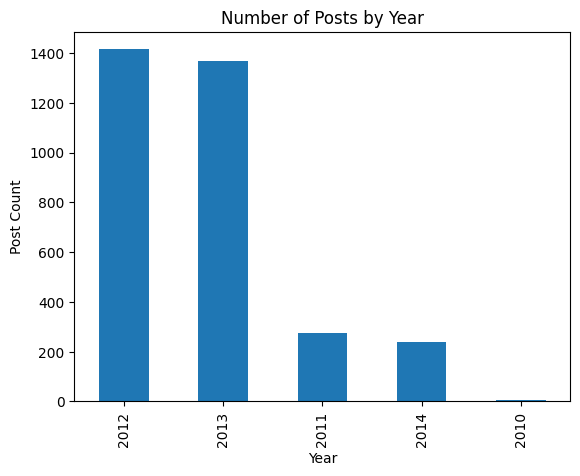

In [69]:
post_counts_by_year.plot.bar()

plt.title("Number of Posts by Year")
plt.xlabel("Year")
plt.ylabel("Post Count")

plt.show()

In [70]:
# 发现2012，2013年rumors多，所以查看这两年多情绪年趋势。

In [71]:
# 记得还要打积极、消极的标签！

In [72]:
# 提取出2012年的所有帖子到新的数据框
posts_2012 = time_ev_df[time_ev_df['time_year'] == '2012']

In [73]:
posts_2012.head()

text  \
2557  两只乌龟在田边一动不动，一专家问老农，它们在干什么？老农说“在比耐力，谁先动谁就输了”专家指...   
2907  【博鳌专报·陈竺：盐油摄入量高成中国居民健康危险性因素】80.9%的家庭人均食盐日摄入量超过...   
1321  【@Stephy邓丽欣 ＆ @Alex方力申 冧爆合唱[心]】 Stephy 08《看透》演...   
2985  #本焕圆寂#本报刚从本焕长老治丧委员会获悉，本焕长老于2012年4月2日0：36在深圳弘法寺...   
3047  今天收拾旧物，竟然翻到了8年前的日记。殴西吧，我还有那么思无邪的时光啊！这么恶心的文字竟然是...   

                                time  weighted_emotion_value time_m_d_y  \
2557  Sun Apr 01 23:53:13 +0800 2012                     0.4 2012-04-01   
2907  Mon Apr 02 11:09:04 +0800 2012                     3.0 2012-04-02   
1321  Mon Apr 02 23:35:06 +0800 2012                     3.0 2012-04-02   
2985  Mon Apr 02 03:29:31 +0800 2012                     2.5 2012-04-02   
3047  Tue Apr 03 23:46:09 +0800 2012                    -5.8 2012-04-03   

     time_year  
2557      2012  
2907      2012  
1321      2012  
2985      2012  
3047      2012

In [74]:
# 制作字典，key(日期)，value（weighted_emotion_value）
time_ev_dict_2012 = {}
# 按日期进行分组，并提取每个日期的帖子的加权情感值列表
grouped_time_ev = posts_2012.groupby('time_m_d_y')
for date, group in grouped_time_ev:
    weighted_values = group['weighted_emotion_value'].tolist()
    time_ev_dict_2012[date] = weighted_values
#time_ev_dict_2012

In [75]:
# 制作字典，key(日期)，value（post_sum）
time_post_sum_dict_2012 = {}
# 统计每个日期的post数量
grouped_time_sum = posts_2012.groupby('time_m_d_y')
for date, group in grouped_time_sum:
    post_sum = len(group)
    time_post_sum_dict_2012[date] = post_sum
time_post_sum_dict_2012

{Timestamp('2012-04-01 00:00:00'): 1,
 Timestamp('2012-04-02 00:00:00'): 3,
 Timestamp('2012-04-03 00:00:00'): 3,
 Timestamp('2012-04-04 00:00:00'): 5,
 Timestamp('2012-04-05 00:00:00'): 3,
 Timestamp('2012-04-06 00:00:00'): 4,
 Timestamp('2012-04-07 00:00:00'): 3,
 Timestamp('2012-04-08 00:00:00'): 5,
 Timestamp('2012-04-09 00:00:00'): 2,
 Timestamp('2012-04-10 00:00:00'): 6,
 Timestamp('2012-04-11 00:00:00'): 3,
 Timestamp('2012-04-12 00:00:00'): 5,
 Timestamp('2012-04-13 00:00:00'): 5,
 Timestamp('2012-04-14 00:00:00'): 2,
 Timestamp('2012-04-15 00:00:00'): 3,
 Timestamp('2012-04-16 00:00:00'): 5,
 Timestamp('2012-04-17 00:00:00'): 3,
 Timestamp('2012-04-18 00:00:00'): 3,
 Timestamp('2012-04-19 00:00:00'): 2,
 Timestamp('2012-04-20 00:00:00'): 5,
 Timestamp('2012-04-21 00:00:00'): 3,
 Timestamp('2012-04-22 00:00:00'): 4,
 Timestamp('2012-04-23 00:00:00'): 5,
 Timestamp('2012-04-24 00:00:00'): 3,
 Timestamp('2012-04-25 00:00:00'): 5,
 Timestamp('2012-04-26 00:00:00'): 2,
 Timestamp('

In [76]:
# 比较情绪值随时间的变化，
# 计算每个日期内的情绪值的平均值，获得一个更全面的情绪变化趋势

In [77]:
# 遍历字典，制作dataframe
date_list_2012 = []
post_count_list_2012 = []
value_list_2012 = []

for date, post_sum in time_post_sum_dict_2012.items():
    if date in time_ev_dict_2012:
        weighted_value = time_ev_dict_2012[date]
        date_list_2012.append(date)
        post_count_list_2012.append(post_sum)
        value_list_2012.append(weighted_value)

In [78]:
time_line_df_2012 = pd.DataFrame({'post_time': date_list_2012,
                             'post_count': post_count_list_2012,
                             'value_list': value_list_2012})
time_line_df_2012

post_time  post_count                                         value_list
0   2012-04-01           1                                              [0.4]
1   2012-04-02           3                                    [3.0, 3.0, 2.5]
2   2012-04-03           3                                  [-5.8, 0.0, -5.0]
3   2012-04-04           5           [2.6666666666666665, 0.0, 0.0, 5.0, 0.0]
4   2012-04-05           3                                    [2.5, 2.0, 0.0]
..         ...         ...                                                ...
265 2012-12-27           3                                    [9.0, 0.0, 0.0]
266 2012-12-28           5  [0.0, 0.0, 0.0, 0.3333333333333333, 1.85714285...
267 2012-12-29           2         [-0.4444444444444444, -1.9090909090909092]
268 2012-12-30           3                      [1.0, 0.0, 2.857142857142857]
269 2012-12-31          11  [5.0, 0.0, 2.0, 5.25, 3.5, 2.0, -2.0, 1.666666...

[270 rows x 3 columns]

In [79]:
import numpy as np
import pandas as pd

# 区分出正负，以得出积极、消极情绪的分类
def categorize_value(value):
    if value > 0:
        return 'Positive'
    elif value < 0:
        return 'Negative'
    else:
        return 'Zero'
# 通过计算，加入列表，每行是一个list of values,便于检查
time_line_df_2012['positive_values'] = time_line_df_2012['value_list'].apply(lambda x: [val for val in x if val > 0])
time_line_df_2012['negative_values'] = time_line_df_2012['value_list'].apply(lambda x: [val for val in x if val < 0])
time_line_df_2012['zero_values'] = time_line_df_2012['value_list'].apply(lambda x: [val for val in x if val == 0])

# 计算不同情绪类别的均值（积极、消极、中性）
time_line_df_2012['positive_count'] = time_line_df_2012['positive_values'].apply(len)
time_line_df_2012['positive_mean'] = time_line_df_2012['positive_values'].apply(np.mean)

time_line_df_2012['negative_count'] = time_line_df_2012['negative_values'].apply(len)
time_line_df_2012['negative_mean'] = time_line_df_2012['negative_values'].apply(np.mean)

time_line_df_2012['zero_count'] = time_line_df_2012['zero_values'].apply(len)

# 缺失值处理，不参与计算
time_line_df_2012 = time_line_df_2012.replace(np.nan, 'NA')

time_line_df_2012

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


post_time  post_count                                         value_list  \
0   2012-04-01           1                                              [0.4]   
1   2012-04-02           3                                    [3.0, 3.0, 2.5]   
2   2012-04-03           3                                  [-5.8, 0.0, -5.0]   
3   2012-04-04           5           [2.6666666666666665, 0.0, 0.0, 5.0, 0.0]   
4   2012-04-05           3                                    [2.5, 2.0, 0.0]   
..         ...         ...                                                ...   
265 2012-12-27           3                                    [9.0, 0.0, 0.0]   
266 2012-12-28           5  [0.0, 0.0, 0.0, 0.3333333333333333, 1.85714285...   
267 2012-12-29           2         [-0.4444444444444444, -1.9090909090909092]   
268 2012-12-30           3                      [1.0, 0.0, 2.857142857142857]   
269 2012-12-31          11  [5.0, 0.0, 2.0, 5.25, 3.5, 2.0, -2.0, 1.666666...   

                                       positive_values  \
0                                                [0.4]   
1                                      [3.0, 3.0, 2.5]   
2                                                   []   
3                            [2.6666666666666665, 5.0]   
4                                           [2.5, 2.0]   
..                                                 ...   
265                                              [9.0]   
266           [0.3333333333333333, 1.8571428571428572]   
267                                                 []   
268                           [1.0, 2.857142857142857]   
269  [5.0, 2.0, 5.25, 3.5, 2.0, 1.6666666666666667,...   

                                negative_values      zero_values  \
0                                            []               []   
1                                            []               []   
2                                  [-5.8, -5.0]            [0.0]   
3                                            []  [0.0, 0.0, 0.0]   
4                                            []            [0.0]   
..                                          ...              ...   
265                                          []       [0.0, 0.0]   
266                                          []  [0.0, 0.0, 0.0]   
267  [-0.4444444444444444, -1.9090909090909092]               []   
268                                          []            [0.0]   
269                 [-2.0, -1.3333333333333333]       [0.0, 0.0]   

     positive_count positive_mean  negative_count negative_mean  zero_count  
0                 1           0.4               0            NA           0  
1                 3      2.833333               0            NA           0  
2                 0            NA               2          -5.4           1  
3                 2      3.833333               0            NA           3  
4                 2          2.25               0            NA           1  
..              ...           ...             ...           ...         ...  
265               1           9.0               0            NA           2  
266               2      1.095238               0            NA           3  
267               0            NA               2     -1.176768           0  
268               2      1.928571               0            NA           1  
269               7      3.059524               2     -1.666667           2  

[270 rows x 11 columns]

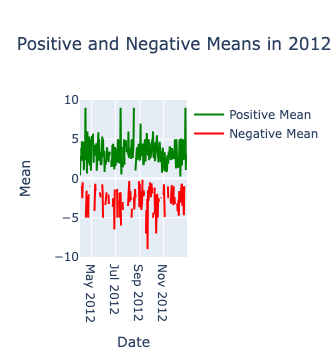

In [80]:
import plotly.graph_objects as go

# 提取均值
dates = time_line_df_2012['post_time']
positive_means = time_line_df_2012['positive_mean']
negative_means = time_line_df_2012['negative_mean']

# 积极和消极情绪，分别为两个trace
positive_trace = go.Scatter(
    x=dates,
    y=positive_means,
    mode='lines',
    name='Positive Mean',
    line=dict(color='green')
)
negative_trace = go.Scatter(
    x=dates,
    y=negative_means,
    mode='lines',
    name='Negative Mean',
    line=dict(color='red')
)

data = [positive_trace, negative_trace]


layout = go.Layout(
    title='Positive and Negative Means in 2012',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Mean')
)


figure = go.Figure(data=data, layout=layout)


figure.show()

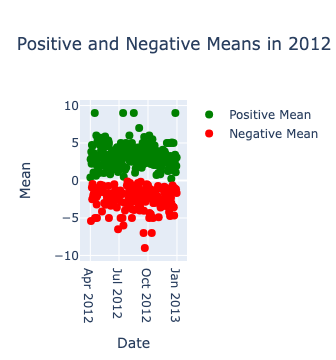

In [81]:
import plotly.graph_objects as go


dates = time_line_df_2012['post_time']
positive_means = time_line_df_2012['positive_mean']
negative_means = time_line_df_2012['negative_mean']


positive_trace = go.Scatter(
    x=dates,
    y=positive_means,
    mode='markers', 
    name='Positive Mean',
    marker=dict(color='green', size=8)  
)
negative_trace = go.Scatter(
    x=dates,
    y=negative_means,
    mode='markers', 
    name='Negative Mean',
    marker=dict(color='red', size=8) 
)


data = [positive_trace, negative_trace]


layout = go.Layout(
    title='Positive and Negative Means in 2012',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Mean')
)


figure = go.Figure(data=data, layout=layout)


figure.show()

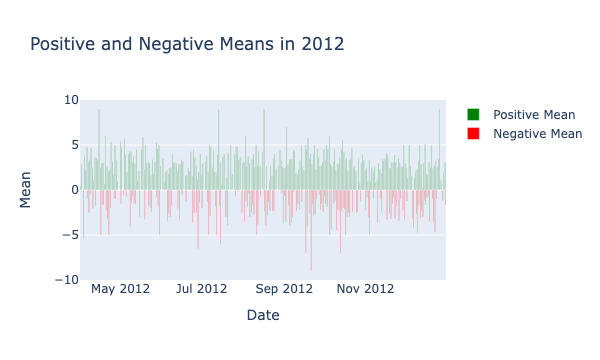

In [82]:
import plotly.graph_objects as go

# 提取 time_line_df_2012 中的 positive_mean 和 negative_mean 列
dates = time_line_df_2012['post_time']
positive_means = time_line_df_2012['positive_mean']
negative_means = time_line_df_2012['negative_mean']

positive_trace = go.Bar(
    x=dates,
    y=positive_means,
    name='Positive Mean',
    marker=dict(color='green') 
)
negative_trace = go.Bar(
    x=dates,
    y=negative_means,
    name='Negative Mean',
    marker=dict(color='red')  
)

data = [positive_trace, negative_trace]

layout = go.Layout(
    title='Positive and Negative Means in 2012',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Mean')
)

figure = go.Figure(data=data, layout=layout)

figure.show()

In [83]:
### 给所有帖子打标签positive，negative，natural，并画时间趋势图，看积极与消极情绪的总体分布

In [84]:
time_ev_df

text  \
1036  [怒] 若是有人在路上拦你，向你推销福建安溪铁观音又建议你闻一下试一下味，千万别上当，那不是...   
1038  临沂市委书记奸淫上百幼女.....（燕赵都市网）.  原文出处http://sinaurl....   
2166  公开招募，有志于微博、手机、SNS等社会化媒体营销传播的年轻达人，男女不限，学历不限，爱玩手...   
2521  #有奖转发#【关注蚂蚁汇，赢imac大奖】参与方式：①关注蚂蚁汇②评论并转发本条微博③@ 5...   
2583  强烈推荐这个视频，Hans Rosling's 200 Countries, 200 Yea...   
...                                                 ...   
694   【出来混迟早是要还的】那个MH370的黑匣子不是被探测到在南太平洋4000到6000米的海沟...   
81    【出来混迟早是要还的】那个MH370的黑匣子不是被探测到在南太平洋4000到6000米的海沟...   
3250  话说MH370航班的黑匣子被探测落在南太平洋4000米至6000米深的海沟后，号称能下潜到7...   
379   说个笑话。话说MH370航班的黑匣子被探测落在了南太平洋4000米至6000米深的海沟后，号...   
3256  【出来混迟早是要还的】那个MH370的黑匣子不是被探测到在南太平洋4000到6000米的海沟...   

                                time  weighted_emotion_value time_m_d_y  \
1036  Thu Dec 02 12:06:58 +0800 2010                0.000000 2010-12-02   
1038  Wed Dec 15 19:15:40 +0800 2010                0.000000 2010-12-15   
2166  Mon Dec 20 11:05:41 +0800 2010                0.250000 2010-12-20   
2521  Thu Dec 23 10:04:53 +0800 2010                6.333333 2010-12-23   
2583  Sun Jan 02 00:21:45 +0800 2011                0.000000 2011-01-02   
...                              ...                     ...        ...   
694   Thu Apr 10 22:32:20 +0800 2014                2.333333 2014-04-10   
81    Thu Apr 10 23:00:01 +0800 2014                2.333333 2014-04-10   
3250  Thu Apr 10 22:50:28 +0800 2014                0.000000 2014-04-10   
379   Thu Apr 10 21:43:35 +0800 2014                0.000000 2014-04-10   
3256  Thu Apr 10 23:10:36 +0800 2014                2.333333 2014-04-10   

     time_year  
1036      2010  
1038      2010  
2166      2010  
2521      2010  
2583      2011  
...        ...  
694       2014  
81        2014  
3250      2014  
379       2014  
3256      2014  

[3300 rows x 5 columns]

In [85]:
import pandas as pd
# 打标签
time_ev_df['label'] = time_ev_df['weighted_emotion_value'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'natural')

time_ev_df

text  \
1036  [怒] 若是有人在路上拦你，向你推销福建安溪铁观音又建议你闻一下试一下味，千万别上当，那不是...   
1038  临沂市委书记奸淫上百幼女.....（燕赵都市网）.  原文出处http://sinaurl....   
2166  公开招募，有志于微博、手机、SNS等社会化媒体营销传播的年轻达人，男女不限，学历不限，爱玩手...   
2521  #有奖转发#【关注蚂蚁汇，赢imac大奖】参与方式：①关注蚂蚁汇②评论并转发本条微博③@ 5...   
2583  强烈推荐这个视频，Hans Rosling's 200 Countries, 200 Yea...   
...                                                 ...   
694   【出来混迟早是要还的】那个MH370的黑匣子不是被探测到在南太平洋4000到6000米的海沟...   
81    【出来混迟早是要还的】那个MH370的黑匣子不是被探测到在南太平洋4000到6000米的海沟...   
3250  话说MH370航班的黑匣子被探测落在南太平洋4000米至6000米深的海沟后，号称能下潜到7...   
379   说个笑话。话说MH370航班的黑匣子被探测落在了南太平洋4000米至6000米深的海沟后，号...   
3256  【出来混迟早是要还的】那个MH370的黑匣子不是被探测到在南太平洋4000到6000米的海沟...   

                                time  weighted_emotion_value time_m_d_y  \
1036  Thu Dec 02 12:06:58 +0800 2010                0.000000 2010-12-02   
1038  Wed Dec 15 19:15:40 +0800 2010                0.000000 2010-12-15   
2166  Mon Dec 20 11:05:41 +0800 2010                0.250000 2010-12-20   
2521  Thu Dec 23 10:04:53 +0800 2010                6.333333 2010-12-23   
2583  Sun Jan 02 00:21:45 +0800 2011                0.000000 2011-01-02   
...                              ...                     ...        ...   
694   Thu Apr 10 22:32:20 +0800 2014                2.333333 2014-04-10   
81    Thu Apr 10 23:00:01 +0800 2014                2.333333 2014-04-10   
3250  Thu Apr 10 22:50:28 +0800 2014                0.000000 2014-04-10   
379   Thu Apr 10 21:43:35 +0800 2014                0.000000 2014-04-10   
3256  Thu Apr 10 23:10:36 +0800 2014                2.333333 2014-04-10   

     time_year     label  
1036      2010   natural  
1038      2010   natural  
2166      2010  positive  
2521      2010  positive  
2583      2011   natural  
...        ...       ...  
694       2014  positive  
81        2014  positive  
3250      2014   natural  
379       2014   natural  
3256      2014  positive  

[3300 rows x 6 columns]

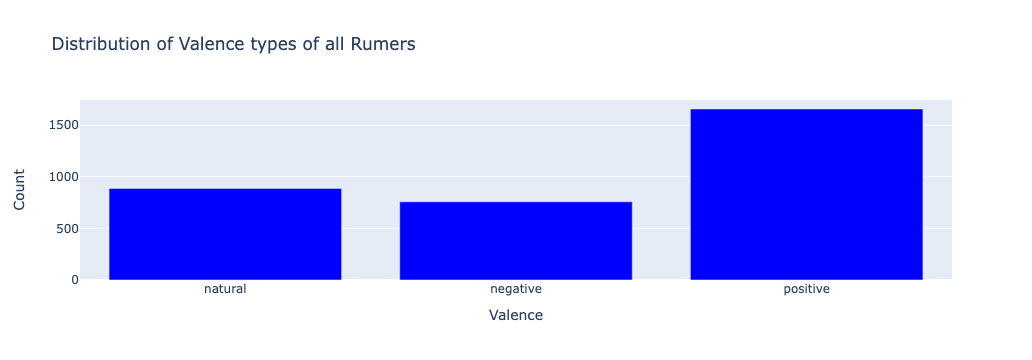

In [86]:
import plotly.graph_objects as go


label_counts = time_ev_df.groupby('label').size()


trace = go.Bar(
    x=label_counts.index,
    y=label_counts.values,
    marker=dict(color='blue'),  
)


data = [trace]

layout = go.Layout(
    title='Distribution of Valence types of all Rumers',
    xaxis=dict(title='Valence'),
    yaxis=dict(title='Count')
)

figure = go.Figure(data=data, layout=layout)

figure.show()

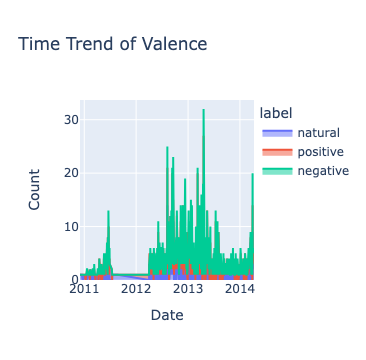

In [87]:
import plotly.express as px

time_ev_df['time_m_d_y'] = pd.to_datetime(time_ev_df['time_m_d_y'])

label_counts = time_ev_df.groupby(['time_m_d_y', 'label']).size().reset_index(name='count')


fig = px.area(label_counts, x='time_m_d_y', y='count', color='label', 
              title='Time Trend of Valence', 
              labels={'time_m_d_y': 'Date', 'count': 'Count'})


fig.show()

## Q6:地图绘制中的数据处理

In [88]:
posts_df['user_location']

0            上海
1            其他
2         江西 上饶
3         吉林 吉林
4       新疆 巴音郭楞
         ...   
3295         广西
3296     贵州 黔西南
3297     上海 徐汇区
3298      江苏 南京
3299     上海 黄浦区
Name: user_location, Length: 3300, dtype: object

In [89]:
# 定义一个函数，用于保留每行前两个中文字符并删除其余字符
def keep_first_two_chinese_chars(text):
    # 使用正则表达式匹配中文字符
    pattern = re.compile(r'[\u4e00-\u9fa5]')
    chinese_chars = ''.join(re.findall(pattern, text))
    
    # 保留前两个中文字符
    result = chinese_chars[:2]
    return result

# 对每一行应用函数进行处理
posts_df['location'] = posts_df['user_location'].apply(keep_first_two_chinese_chars)

# 输出处理后的结果
posts_df['location']


0       上海
1       其他
2       江西
3       吉林
4       新疆
        ..
3295    广西
3296    贵州
3297    上海
3298    江苏
3299    上海
Name: location, Length: 3300, dtype: object

In [90]:
# 从posts_df['location']读取数据
data = {'location': posts_df['location'].tolist()}

# 创建DataFrame
df = pd.DataFrame(data)

# 计算每个地区的帖子数量
counts = df['location'].value_counts()



In [91]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取中国地图的地理数据
china_map = gpd.read_file('中华人民共和国.json')
# 合并帖子数量数据和地理数据
merged_data = china_map.merge(counts, left_on='name', right_index=True, how='left')
# 对每一行应用函数进行处理
merged_data['name'] = merged_data['name'].apply(keep_first_two_chinese_chars)


In [93]:
merged_data

adcode name adchar  childrenNum     level              parent  \
0      110000   北京   None         16.0  province  {'adcode': 100000}   
1      120000   天津   None         16.0  province  {'adcode': 100000}   
2      130000   河北   None         11.0  province  {'adcode': 100000}   
3      140000   山西   None         11.0  province  {'adcode': 100000}   
4      150000   内蒙   None         12.0  province  {'adcode': 100000}   
5      210000   辽宁   None         14.0  province  {'adcode': 100000}   
6      220000   吉林   None          9.0  province  {'adcode': 100000}   
7      230000   黑龙   None         13.0  province  {'adcode': 100000}   
8      310000   上海   None         16.0  province  {'adcode': 100000}   
9      320000   江苏   None         13.0  province  {'adcode': 100000}   
10     330000   浙江   None         11.0  province  {'adcode': 100000}   
11     340000   安徽   None         16.0  province  {'adcode': 100000}   
12     350000   福建   None          9.0  province  {'adcode': 100000}   
13     360000   江西   None         11.0  province  {'adcode': 100000}   
14     370000   山东   None         16.0  province  {'adcode': 100000}   
15     410000   河南   None         18.0  province  {'adcode': 100000}   
16     420000   湖北   None         17.0  province  {'adcode': 100000}   
17     430000   湖南   None         14.0  province  {'adcode': 100000}   
18     440000   广东   None         21.0  province  {'adcode': 100000}   
19     450000   广西   None         14.0  province  {'adcode': 100000}   
20     460000   海南   None         19.0  province  {'adcode': 100000}   
21     500000   重庆   None         38.0  province  {'adcode': 100000}   
22     510000   四川   None         21.0  province  {'adcode': 100000}   
23     520000   贵州   None          9.0  province  {'adcode': 100000}   
24     530000   云南   None         16.0  province  {'adcode': 100000}   
25     540000   西藏   None          7.0  province  {'adcode': 100000}   
26     610000   陕西   None         10.0  province  {'adcode': 100000}   
27     620000   甘肃   None         14.0  province  {'adcode': 100000}   
28     630000   青海   None          8.0  province  {'adcode': 100000}   
29     640000   宁夏   None          5.0  province  {'adcode': 100000}   
30     650000   新疆   None         24.0  province  {'adcode': 100000}   
31     710000   台湾   None          0.0  province  {'adcode': 100000}   
32     810000   香港   None         18.0  province  {'adcode': 100000}   
33     820000   澳门   None          8.0  province  {'adcode': 100000}   
34  100000_JD          JD          NaN      None                None   

    subFeatureIndex                                           geometry  count  
0               0.0  MULTIPOLYGON (((117.34861 40.58114, 117.38988 ...    NaN  
1               1.0  MULTIPOLYGON (((117.76560 39.40053, 117.84691 ...    NaN  
2               2.0  MULTIPOLYGON (((117.46749 40.64974, 117.41267 ...    NaN  
3               3.0  MULTIPOLYGON (((110.37926 34.60061, 110.42484 ...    NaN  
4               4.0  POLYGON ((97.17290 42.79526, 97.37123 42.45708...    NaN  
5               5.0  MULTIPOLYGON (((123.53449 39.78836, 123.54681 ...    NaN  
6               6.0  MULTIPOLYGON (((129.60149 42.41512, 129.60149 ...    NaN  
7               7.0  MULTIPOLYGON (((123.56960 46.22382, 123.60471 ...    NaN  
8               8.0  MULTIPOLYGON (((120.90135 31.01733, 120.94015 ...    NaN  
9               9.0  MULTIPOLYGON (((117.31165 34.56169, 117.27285 ...    NaN  
10             10.0  MULTIPOLYGON (((118.43390 28.28834, 118.44437 ...    NaN  
11             11.0  MULTIPOLYGON (((116.59963 34.01432, 116.64151 ...    NaN  
12             12.0  MULTIPOLYGON (((119.00487 24.97001, 118.98947 ...    NaN  
13             13.0  MULTIPOLYGON (((118.19306 29.39547, 118.13640 ...    NaN  
14             14.0  MULTIPOLYGON (((116.37420 34.64001, 116.39206 ...    NaN  
15             15.0  MULTIPOLYGON (((112.71675 32.35761, 112.73584 ...    NaN  
16             16.0  MULTIPOLYGON (((111.04570 33.1698

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/plotting.py:967: UserWarning:

Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/plotting.py:967: UserWarning:

Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/plotting.py:967: UserWarning:

Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/plotting.py:967: UserWarning:

Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/plotting.py:967: UserWarning:

Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from current font.

/Library/Frameworks/Python.fra

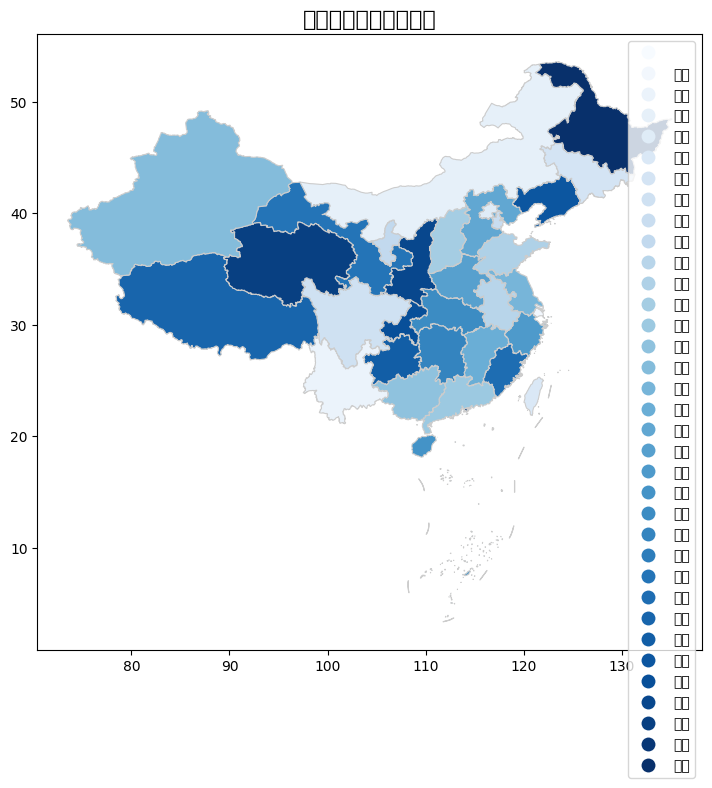

In [94]:
# 绘制地图
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='name', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('中国各省份的帖子数量', fontdict={'fontsize': '16'})
plt.show()

## Q7:时间趋势上看topic的类别变化

In [95]:
import pandas as pd
topic_tag_df = pd.read_csv("/Users/zhimeilin/Desktop/G1 - final - ZHI/LDA/table_topic.csv")
topic_tag_df.head()

Unnamed: 0  rumor                                               text  \
0           0   True  人间惨剧：今天下午约14点，宁波妇儿医院，一妇女携带一婴儿在住院楼跳楼，后抢救无效死亡。具体...   
1           1   True  再去武大，已无牌坊！非要拆掉？@章立凡 @袁裕来律师 @老徐时评 @徐昕 @杨锦麟 @左小祖...   
2           2   True  中国最美丽的乡村"江西婺源"一"教师打死学生" 昨晚，在被誉为中国最美丽的乡村江西省婺源县清...   
3           3   True  忍者QS：江苏省东海县女镇党委书记徐艳，因不愿陪县委书记关永健上床，竟然被警察毒打致子宫破裂...   
4           4   True  《北大猛男，持刀刺官！！！》“可歌可泣”的是王同学投案自首之后冷冷说了一句话是 “我并不后悔...   

   has_url  comments  pics        source  likes  \
0    False        55     1  微博 weibo.com      0   
1    False       170     1  微博 weibo.com      0   
2     True       466     0            微吧      0   
3     True        15     0  微博 weibo.com      6   
4    False        78     1      360安全浏览器     11   

                             time  reposts  ...   安全        民生  民生.1 社会反讽  \
0  Tue Sep 11 11:34:22 +0800 2012      225  ...  0.0  0.000000   0.0  0.0   
1  Tue Oct 09 15:44:54 +0800 2012      395  ...  0.0  0.939782   0.0  0.0   
2  Wed Mar 13 11:55:24 +0800 2013      685  ...  0.0  0.000000   0.0  0.0   
3  Sat Oct 05 19:17:42 +0800 2013      120  ...  0.0  0.432573   0.0  0.0   
4  Thu May 09 13:46:10 +0800 2013      532  ...  0.0  0.000000   0.0  0.0   

    科普  祈祷祝福      极端事件     正能量信息  地震/奥运相关  Topic  
0  0.0   0.0  0.974984  0.000000      0.0   极端事件  
1  0.0   0.0  0.000000  0.000000      0.0     民生  
2  0.0   0.0  0.000000  0.977446      0.0  正能量信息  
3  0.0   0.0  0.000000  0.546844      0.0  正能量信息  
4  0.0   0.0  0.954882  0.000000      0.0   极端事件  

[5 rows x 32 columns]

In [96]:
# time_ev_df 恢复index排序
# 合并表格
time_ev_topic_df = pd.concat([time_ev_df.sort_index(), topic_tag_df['Topic']], axis=1)
time_ev_topic_df

text  \
0     人间惨剧：今天下午约14点，宁波妇儿医院，一妇女携带一婴儿在住院楼跳楼，后抢救无效死亡。具体...   
1     再去武大，已无牌坊！非要拆掉？@章立凡 @袁裕来律师 @老徐时评 @徐昕 @杨锦麟 @左小祖...   
2     中国最美丽的乡村"江西婺源"一"教师打死学生" 昨晚，在被誉为中国最美丽的乡村江西省婺源县清...   
3     忍者QS：江苏省东海县女镇党委书记徐艳，因不愿陪县委书记关永健上床，竟然被警察毒打致子宫破裂...   
4     《北大猛男，持刀刺官！！！》“可歌可泣”的是王同学投案自首之后冷冷说了一句话是 “我并不后悔...   
...                                                 ...   
3295  【20日，洛阳一名约50岁裸女站在一辆法院的车上大喊“苍天啊”，引发市民围观与。据说该女子弟...   
3296  这是著名的云南怒江傈僳族女孩飞索渡江求学！每年都有十几个孩子掉进滚滚怒江，修一座桥40万，当...   
3297                             这是一对父子合影。。。很真实的中国社会写照。   
3298                 两军舰已和日本海军交火，不知是杜撰还是确切消息~~！by@思yan儿   
3299  【新华网：“性贿赂”史上“最美高官情妇”卢嘉丽】 卢嘉丽（1975年— ），江苏镇江人，化名...   

                                time  weighted_emotion_value time_m_d_y  \
0     Tue Sep 11 11:34:22 +0800 2012                0.000000 2012-09-11   
1     Tue Oct 09 15:44:54 +0800 2012                0.000000 2012-10-09   
2     Wed Mar 13 11:55:24 +0800 2013                1.000000 2013-03-13   
3     Sat Oct 05 19:17:42 +0800 2013               -5.800000 2013-10-05   
4     Thu May 09 13:46:10 +0800 2013                2.250000 2013-05-09   
...                              ...                     ...        ...   
3295  Fri Mar 22 21:37:56 +0800 2013                0.444444 2013-03-22   
3296  Thu Jul 18 10:40:06 +0800 2013                1.500000 2013-07-18   
3297  Tue Jul 23 12:26:43 +0800 2013                3.000000 2013-07-23   
3298  Tue Sep 11 13:45:11 +0800 2012                0.000000 2012-09-11   
3299  Sat Jan 19 16:23:59 +0800 2013               -1.500000 2013-01-19   

     time_year     label     Topic  
0         2012   natural      极端事件  
1         2012   natural        民生  
2         2013  positive     正能量信息  
3         2013  negative     正能量信息  
4         2013  positive      极端事件  
...        ...       ...       ...  
3295      2013  positive  地震、奥运及其他  
3296      2013  positive      社会反讽  
3297      2013  positive        民生  
3298      2012   natural        科普  
3299      2013  negative        科普  

[3300 rows x 7 columns]

In [97]:
######## time trend of topic

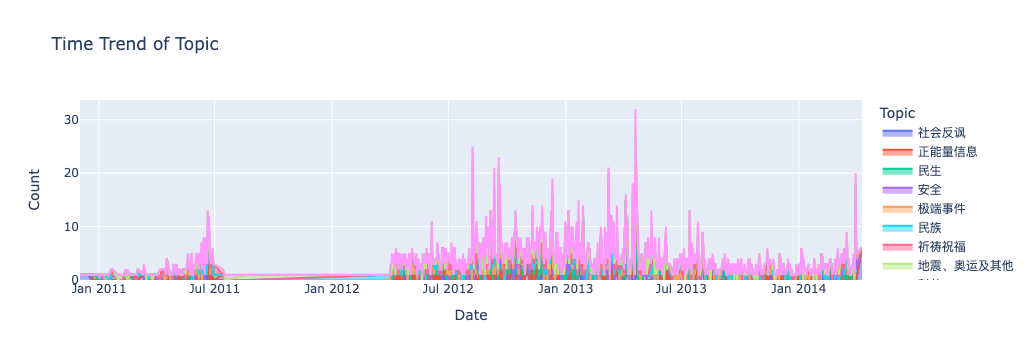

In [98]:
#----------topic of timeline
import plotly.express as px

Topic_counts = time_ev_topic_df.groupby(['time_m_d_y', 'Topic']).size().reset_index(name='count')

fig = px.area(Topic_counts, x='time_m_d_y', y='count', color='Topic', 
              title='Time Trend of Topic', 
              labels={'time_m_d_y': 'Date', 'count': 'Count'})


fig.show()

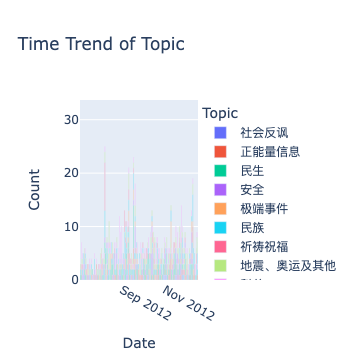

In [99]:
fig = px.bar(Topic_counts, x='time_m_d_y', y='count', color='Topic', 
             title='Time Trend of Topic', 
             labels={'time_m_d_y': 'Date', 'count': 'Count'})

fig.show()

## Q8:account verification，topic，emotion，三者的关系，桑基图

In [100]:
##### relationship：topic，valence，verification type

In [101]:
posts_df.head()

Unnamed: 0  rumor                                               text  \
0           0   True  人间惨剧：今天下午约14点，宁波妇儿医院，一妇女携带一婴儿在住院楼跳楼，后抢救无效死亡。具体...   
1           1   True  再去武大，已无牌坊！非要拆掉？@章立凡 @袁裕来律师 @老徐时评 @徐昕 @杨锦麟 @左小祖...   
2           2   True  中国最美丽的乡村"江西婺源"一"教师打死学生" 昨晚，在被誉为中国最美丽的乡村江西省婺源县清...   
3           3   True  忍者QS：江苏省东海县女镇党委书记徐艳，因不愿陪县委书记关永健上床，竟然被警察毒打致子宫破裂...   
4           4   True  《北大猛男，持刀刺官！！！》“可歌可泣”的是王同学投案自首之后冷冷说了一句话是 “我并不后悔...   

   has_url  comments  pics        source  likes  \
0    False        55     1  微博 weibo.com      0   
1    False       170     1  微博 weibo.com      0   
2     True       466     0            微吧      0   
3     True        15     0  微博 weibo.com      6   
4    False        78     1      360安全浏览器     11   

                             time  reposts  ...  user_verified_type  \
0  Tue Sep 11 11:34:22 +0800 2012      225  ...                  -1   
1  Tue Oct 09 15:44:54 +0800 2012      395  ...                  -1   
2  Wed Mar 13 11:55:24 +0800 2013      685  ...                  -1   
3  Sat Oct 05 19:17:42 +0800 2013      120  ...                  -1   
4  Thu May 09 13:46:10 +0800 2013      532  ...                  -1   

                                        text_cleaned  Disgust Awe  Joy  \
0  人间 惨剧 今天下午 约点 宁波 妇儿 医院 妇女 携带 婴儿 住院楼 跳楼 抢救无效 死亡...        2   1    0   
1                                         武大 牌坊 非 拆掉        0   0    0   
2  中国 美丽 乡村 江西 婺源 教师 打死 学生 昨晚 被誉为 中国 美丽 乡村 江西省 婺源...        2   6    0   
3  忍者 qs 江苏省 东海县 女镇 党委书记 徐艳 因不愿 陪 县委书记 关永健 上床 竟然 ...        5   0    0   
4  北大 猛男 持刀 刺官 可歌可泣 王 同学 投案自首 之后 冷冷 说 一句 话 后悔 不让 ...        1   2    0   

   Sadness Fear  Surprise  Angry  location  
0        2    1         0      0        上海  
1        0    0         0      0        其他  
2        1    1         0      0        江西  
3        1    0         0      0        吉林  
4        1    0         0      0        新疆  

[5 rows x 29 columns]

In [102]:
veri_topic_ev = pd.concat([time_ev_topic_df[['label','Topic']].sort_index(), posts_df['user_verified_type'], posts_df[['Disgust', 'Awe', 'Joy', 'Sadness', 'Fear', 'Surprise', 'Angry']]], axis=1)

In [103]:
veri_topic_ev.head()

label  Topic  user_verified_type  Disgust  Awe  Joy  Sadness  Fear  \
0   natural   极端事件                  -1        2    1    0        2     1   
1   natural     民生                  -1        0    0    0        0     0   
2  positive  正能量信息                  -1        2    6    0        1     1   
3  negative  正能量信息                  -1        5    0    0        1     0   
4  positive   极端事件                  -1        1    2    0        1     0   

   Surprise  Angry  
0         0      0  
1         0      0  
2         0      0  
3         0      0  
4         0      0

In [104]:
import pandas as pd

# Mapping dictionary for user_verified_type
user_verified = {
    -1: 'unverified',
    0: 'the famous user',
    1: 'government',
    2: 'enterprise',
    3: 'medium',
    4: 'school',
    5: 'website',
    6: 'application',
    7: 'organization'
}

veri_topic_ev['user_verified_type'] = veri_topic_ev['user_verified_type'].replace(user_verified)
else_values = [8, 9, 10, -220, 220,200]
veri_topic_ev['user_verified_type'] = veri_topic_ev['user_verified_type'].replace(else_values, 'else')

# 改成 str
veri_topic_ev['user_verified_type'] = veri_topic_ev['user_verified_type'].astype(str)

veri_topic_ev.head()

label  Topic user_verified_type  Disgust  Awe  Joy  Sadness  Fear  \
0   natural   极端事件         unverified        2    1    0        2     1   
1   natural     民生         unverified        0    0    0        0     0   
2  positive  正能量信息         unverified        2    6    0        1     1   
3  negative  正能量信息         unverified        5    0    0        1     0   
4  positive   极端事件         unverified        1    2    0        1     0   

   Surprise  Angry  
0         0      0  
1         0      0  
2         0      0  
3         0      0  
4         0      0

In [105]:
import plotly.graph_objects as go
import pandas as pd

# 分类
grouped_sankey = veri_topic_ev.groupby(['user_verified_type', 'Topic', 'label']).sum()
# 节点
user_verified_types = sorted(veri_topic_ev['user_verified_type'].unique())
topics = sorted(veri_topic_ev['Topic'].unique())
labels = sorted(veri_topic_ev['label'].unique())
user_verified_types,topics,labels 

(['application',
  'else',
  'enterprise',
  'government',
  'medium',
  'organization',
  'school',
  'the famous user',
  'unverified',
  'website'],
 ['地震、奥运及其他', '安全', '极端事件', '正能量信息', '民族', '民生', '社会反讽', '祈祷祝福', '科普'],
 ['natural', 'negative', 'positive'])

In [106]:
veri_topic_ev.to_csv("veri_topic_ev.csv", index=True)

In [107]:
# 数据处理
veri_topic_ev["all_post"] = "all posts"
veri_topic_ev["verification"] =veri_topic_ev["user_verified_type"]
veri_topic_ev["post_topics"] = veri_topic_ev["Topic"]
veri_topic_ev["post_valence"] = veri_topic_ev["label"]
veri_topic_ev.head(10)

label     Topic user_verified_type  Disgust  Awe  Joy  Sadness  Fear  \
0   natural      极端事件         unverified        2    1    0        2     1   
1   natural        民生         unverified        0    0    0        0     0   
2  positive     正能量信息         unverified        2    6    0        1     1   
3  negative     正能量信息         unverified        5    0    0        1     0   
4  positive      极端事件         unverified        1    2    0        1     0   
5  positive  地震、奥运及其他               else        3    4    1        0     0   
6  positive      祈祷祝福         unverified        1    3    0        0     0   
7   natural        民生               else        7    0    0        0     0   
8   natural      社会反讽    the famous user        0    0    0        0     0   
9  positive        民族         unverified        0    2    0        1     2   

   Surprise  Angry   all_post     verification post_topics post_valence  
0         0      0  all posts       unverified        极端事件      natural  
1         0      0  all posts       unverified          民生      natural  
2         0      0  all posts       unverified       正能量信息     positive  
3         0      0  all posts       unverified       正能量信息     negative  
4         0      0  all posts       unverified        极端事件     positive  
5         0      0  all posts             else    地震、奥运及其他     positive  
6         0      0  all posts       unverified        祈祷祝福     positive  
7         0      0  all posts             else          民生      natural  
8         0      0  all posts  the famous user        社会反讽      natural  
9         0      0  all posts       unverified          民族     positive

In [108]:
# Pyecharts桑基图数据1：节点列表
nodes = pd.concat([veri_topic_ev["all_post"],veri_topic_ev["verification"],veri_topic_ev["post_topics"],veri_topic_ev["post_valence"]]).unique()
nodes

array(['all posts', 'unverified', 'else', 'the famous user', 'website',
       'enterprise', 'organization', 'government', 'medium', 'school',
       'application', '极端事件', '民生', '正能量信息', '地震、奥运及其他', '祈祷祝福', '社会反讽',
       '民族', '安全', '科普', 'natural', 'positive', 'negative'], dtype=object)

In [109]:
# Pyecharts桑基图数据2：节点到达关系列表
type_list = ["all_post","verification","post_topics","post_valence"]
from_to_list = []
for idx in range (len (type_list)-1) : # 相邻配对
    from_type = type_list[idx]
    to_type = type_list[idx+1]
    
    df_agg = veri_topic_ev.groupby([from_type, to_type]).size().reset_index()
    df_agg.columns = ["from", "to", "value"]
    for _,(from_key, to_key, value) in df_agg.iterrows():
        from_to_list.append ([from_key, to_key, value])
from_to_list

[['all posts', 'application', 3],
 ['all posts', 'else', 265],
 ['all posts', 'enterprise', 174],
 ['all posts', 'government', 18],
 ['all posts', 'medium', 601],
 ['all posts', 'organization', 23],
 ['all posts', 'school', 7],
 ['all posts', 'the famous user', 1038],
 ['all posts', 'unverified', 1109],
 ['all posts', 'website', 62],
 ['application', '地震、奥运及其他', 1],
 ['application', '安全', 1],
 ['application', '民生', 1],
 ['else', '地震、奥运及其他', 30],
 ['else', '安全', 26],
 ['else', '极端事件', 28],
 ['else', '正能量信息', 29],
 ['else', '民族', 27],
 ['else', '民生', 59],
 ['else', '社会反讽', 11],
 ['else', '祈祷祝福', 27],
 ['else', '科普', 28],
 ['enterprise', '地震、奥运及其他', 22],
 ['enterprise', '安全', 15],
 ['enterprise', '极端事件', 7],
 ['enterprise', '正能量信息', 16],
 ['enterprise', '民族', 15],
 ['enterprise', '民生', 43],
 ['enterprise', '社会反讽', 19],
 ['enterprise', '祈祷祝福', 19],
 ['enterprise', '科普', 18],
 ['government', '安全', 1],
 ['government', '正能量信息', 4],
 ['government', '民族', 2],
 ['government', '民生', 4],
 ['govern

In [110]:
# 节点——字典
pyecharts_nodes = [{"name":node} for node in nodes]
pyecharts_nodes

[{'name': 'all posts'},
 {'name': 'unverified'},
 {'name': 'else'},
 {'name': 'the famous user'},
 {'name': 'website'},
 {'name': 'enterprise'},
 {'name': 'organization'},
 {'name': 'government'},
 {'name': 'medium'},
 {'name': 'school'},
 {'name': 'application'},
 {'name': '极端事件'},
 {'name': '民生'},
 {'name': '正能量信息'},
 {'name': '地震、奥运及其他'},
 {'name': '祈祷祝福'},
 {'name': '社会反讽'},
 {'name': '民族'},
 {'name': '安全'},
 {'name': '科普'},
 {'name': 'natural'},
 {'name': 'positive'},
 {'name': 'negative'}]

In [111]:
# 关系——字典
pyecharts_links = [{"source" :source,"target":target,"value":value} for source,target,value in from_to_list]
pyecharts_links

[{'source': 'all posts', 'target': 'application', 'value': 3},
 {'source': 'all posts', 'target': 'else', 'value': 265},
 {'source': 'all posts', 'target': 'enterprise', 'value': 174},
 {'source': 'all posts', 'target': 'government', 'value': 18},
 {'source': 'all posts', 'target': 'medium', 'value': 601},
 {'source': 'all posts', 'target': 'organization', 'value': 23},
 {'source': 'all posts', 'target': 'school', 'value': 7},
 {'source': 'all posts', 'target': 'the famous user', 'value': 1038},
 {'source': 'all posts', 'target': 'unverified', 'value': 1109},
 {'source': 'all posts', 'target': 'website', 'value': 62},
 {'source': 'application', 'target': '地震、奥运及其他', 'value': 1},
 {'source': 'application', 'target': '安全', 'value': 1},
 {'source': 'application', 'target': '民生', 'value': 1},
 {'source': 'else', 'target': '地震、奥运及其他', 'value': 30},
 {'source': 'else', 'target': '安全', 'value': 26},
 {'source': 'else', 'target': '极端事件', 'value': 28},
 {'source': 'else', 'target': '正能量信息', 'va

In [112]:
# 画图
from pyecharts import options as opts 
from pyecharts.charts import Sankey

sankey = (Sankey().add("",pyecharts_nodes,pyecharts_links,
                      linestyle_opt=opts.LineStyleOpts (opacity=0.2, curve=0.5, color="source"),
                      label_opts=opts .LabelOpts(position="right"))
                       .set_global_opts(title_opts=opts.TitleOpts(title="Rumor account verification - topic - valence")))
                       
# 图片不知道为什么不能直接显示
sankey.render("sankey_diagram.html")

'/Users/zhimeilin/Desktop/G1 - final - ZHI/sankey_diagram.html'

In [113]:
from IPython.display import display, IFrame
# 显示图片
display(IFrame(src='sankey_diagram.html', width=800, height=600))

In [187]:
import matplotlib.pyplot as plt
# topic到valence两层索引，计算数值
# .unstack()将第二层索引变成行，方便调取数据
grouped_topic_valence = veri_topic_ev.groupby(['post_topics','post_valence']).size().unstack()
grouped_topic_valence

post_valence  natural  negative  positive
post_topics                              
地震、奥运及其他          101        86       187
安全                104        75       127
极端事件               76        51       145
正能量信息              90        70       185
民族                 90       108       169
民生                183       165       344
社会反讽               67        70       152
祈祷祝福               85        66       157
科普                 91        66       190

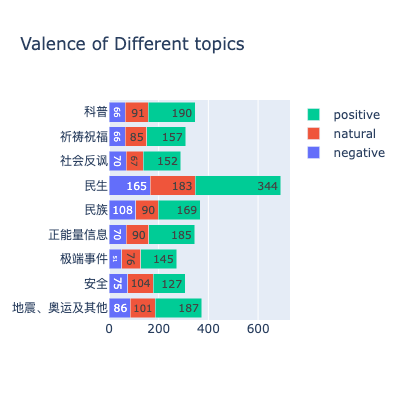

In [209]:
# 从 topic 到 valence，解释桑基图后半段
# 桑基图前半段的解释在另一个组员那
import plotly.graph_objects as go

post_topics = grouped_topic_valence.index
negative = grouped_topic_valence['negative']
positive = grouped_topic_valence['positive']
natural = grouped_topic_valence['natural']

trace1 = go.Bar(y=post_topics, x=negative, text=negative, name='negative', orientation='h')
trace2 = go.Bar(y=post_topics, x=natural, text=natural, name='natural', orientation='h')
trace3 = go.Bar(y=post_topics, x=positive, text=positive, name='positive', orientation='h')

layout_stack = go.Layout(barmode='stack', height=400, width=800,title="Valence of Different topics")
figure_stack = go.Figure(data=[trace1, trace2, trace3], layout=layout_stack)

figure_stack.show()


## Q9:积极情感词和消极情感词在post的相关词语义网络（未成功实现）

In [114]:
# 情感 topic 词共现

In [115]:
veri_topic_ev

label     Topic user_verified_type  Disgust  Awe  Joy  Sadness  Fear  \
0      natural      极端事件         unverified        2    1    0        2     1   
1      natural        民生         unverified        0    0    0        0     0   
2     positive     正能量信息         unverified        2    6    0        1     1   
3     negative     正能量信息         unverified        5    0    0        1     0   
4     positive      极端事件         unverified        1    2    0        1     0   
...        ...       ...                ...      ...  ...  ...      ...   ...   
3295  positive  地震、奥运及其他    the famous user        4    3    0        2     1   
3296  positive      社会反讽    the famous user        2    1    0        0     0   
3297  positive        民生         unverified        0    1    0        0     0   
3298   natural        科普         unverified        0    0    0        1     1   
3299  negative        科普         unverified        7    2    0        0     1   

      Surprise  Angry   all_post     verification post_topics post_valence  
0            0      0  all posts       unverified        极端事件      natural  
1            0      0  all posts       unverified          民生      natural  
2            0      0  all posts       unverified       正能量信息     positive  
3            0      0  all posts       unverified       正能量信息     negative  
4            0      0  all posts       unverified        极端事件     positive  
...        ...    ...        ...              ...         ...          ...  
3295         0      0  all posts  the famous user    地震、奥运及其他     positive  
3296         0      0  all posts  the famous user        社会反讽     positive  
3297         0      0  all posts       unverified          民生     positive  
3298         0      0  all posts       unverified          科普      natural  
3299         0      0  all posts       unverified          科普     negative  

[3300 rows x 14 columns]

In [116]:
valence_dict = {}  # 情绪效价词典
# 遍历每一行
for index, row in dic_df.iterrows():
    word = row['word']
    valence = row['valence']

    # 根据valence的值确定情绪类别
    if valence == -1.0:
        valence = 'negative'
    elif valence == 1.0:
        valence = 'positive'
    else:
        valence = 'natural'

    # 将词语录入情绪词典
    valence_dict[word] = valence
valence_dict

{'脏乱': 'negative',
 '糟报': 'negative',
 '早衰': 'negative',
 '责备': 'negative',
 '贼眼': 'negative',
 '战祸': 'negative',
 '招灾': 'negative',
 '折辱': 'negative',
 '中山狼': 'negative',
 '清峻': 'natural',
 '清莹': 'positive',
 '轻倩': 'positive',
 '晴丽': 'positive',
 '求索': 'positive',
 '热潮': 'positive',
 '仁政': 'positive',
 '荣名': 'positive',
 '柔腻': 'positive',
 '瑞雪': 'positive',
 '擅名': 'positive',
 '神采': 'positive',
 '省便': 'positive',
 '盛开': 'positive',
 '盛誉': 'positive',
 '诗仙': 'positive',
 '爽脆': 'positive',
 '素洁': 'positive',
 '诪张': 'negative',
 '株连': 'negative',
 '坠毁': 'negative',
 '滋生': 'negative',
 '自恃': 'negative',
 '走后门': 'negative',
 '阻力': 'negative',
 '罪状': 'negative',
 '做戏': 'negative',
 '甜头': 'positive',
 '头名': 'positive',
 '婉妙': 'positive',
 '温淑': 'positive',
 '稳厚': 'positive',
 '沃壤': 'positive',
 '无上': 'positive',
 '喜人': 'positive',
 '先贤': 'positive',
 '鲜妍': 'positive',
 '相称': 'positive',
 '骁骑': 'positive',
 '新巧': 'positive',
 '新意': 'positive',
 '信奉': 'positive',
 '急智': 'positive',
 '技艺': 'pos

In [117]:
negative_list = []
positive_list = []
natural_list = []

for word, valence in valence_dict.items():
    if valence == 'negative':
        negative_list.append(word)
    elif valence == 'positive':
        positive_list.append(word)
    elif valence == 'natural':
        natural_list.append(word)


In [118]:
val_word_dic = {'negative': [], 'positive': [], 'natural': []}  # 协同词典

# 遍历每一行帖子的帖文
for post in posts_df['text_cleaned']:
    words = post.split()  # 每个帖子以空格分隔词语

    # 遍历每个词语
    for word in words:
        if word in valence_dict:
            valence = valence_dict[word]
            val_word_dic[valence].append(word)
val_word_dic

{'negative': ['死地',
  '毒打',
  '破裂',
  '贪污',
  '贪污',
  '受贿',
  '冷冷',
  '拐卖',
  '人贩子',
  '团伙',
  '严重',
  '无耻',
  '肆无忌惮',
  '诈骗',
  '抢劫',
  '挥霍',
  '明目张胆',
  '贪污',
  '视而不见',
  '贪婪',
  '乌龟',
  '严重',
  '失业',
  '阉割',
  '闹事',
  '殴打',
  '失职',
  '强行',
  '散落',
  '哄抢',
  '色情',
  '饭桶',
  '色情',
  '勒索',
  '严重',
  '阴影',
  '黑心',
  '施暴',
  '污染',
  '污染',
  '事故',
  '事故',
  '装b',
  '恶心',
  '虚伪',
  '霸气',
  '强奸',
  '强奸',
  '强奸',
  '过失',
  '强奸',
  '国耻',
  '随便',
  '小动作',
  '蛀虫',
  '身故',
  '讽刺',
  '致使',
  '阉割',
  '阉割',
  '拐卖',
  '麻烦',
  '落马',
  '情妇',
  '调戏',
  '异味',
  '生前',
  '屠夫',
  '欺负',
  '逼迫',
  '吸毒',
  '逼迫',
  '吸毒',
  '威胁',
  '诈骗',
  '骗子',
  '阉割',
  '阉割',
  '炫耀',
  '杀害',
  '情妇',
  '作死',
  '虐待',
  '官官相护',
  '家破人亡',
  '伤亡',
  '屠夫',
  '恶人',
  '恶人',
  '抄袭',
  '舞弊',
  '惩罚',
  '反感',
  '不利',
  '伤口',
  '骗人',
  '不景气',
  '子虚',
  '黑帮',
  '遇难',
  '偷情',
  '团伙',
  '散落',
  '有恃无恐',
  '威胁',
  '危机',
  '粉饰',
  '耽误',
  '脏话',
  '色情',
  '勾引',
  '不雅',
  '手段',
  '敲诈',
  '无视',
  '逆子',
  '游手好闲',
  '报复',
  '不满',
  '人贩子',
  '团伙',
  

In [119]:
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

In [120]:
from gensim.models import Word2Vec

In [121]:
# 获取所有的post word lists
sentences = posts_df['text_cleaned'].tolist()

# 训练Word2Vec模型
model = Word2Vec(sentences=sentences, size=100, window=5, min_count=1, workers=4)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gensim/models/base_any2vec.py:742: UserWarning:

C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.



In [122]:
# 获取和negative_list相关的词语
related_words = []

for word in negative_list:
    if word in model.wv.vocab:
        similar_words = model.wv.most_similar(positive=[word], topn=5)
        related_words.extend([w[0] for w in similar_words])

# 去重相关词语
related_words = list(set(related_words))

# 输出结果
print("Related Words:")
print(related_words)

Related Words:
[]


# 其他统计检验or统计图

## 数据处理

In [149]:
## 备忘：哑变量，账号认证类别
## 【说明】由于else没有备注是哪种类型，所以不计入统计。

In [150]:
veri_topic_ev.head(10)

label     Topic user_verified_type  Disgust  Awe  Joy  Sadness  Fear  \
0   natural      极端事件         unverified        2    1    0        2     1   
1   natural        民生         unverified        0    0    0        0     0   
2  positive     正能量信息         unverified        2    6    0        1     1   
3  negative     正能量信息         unverified        5    0    0        1     0   
4  positive      极端事件         unverified        1    2    0        1     0   
5  positive  地震、奥运及其他               else        3    4    1        0     0   
6  positive      祈祷祝福         unverified        1    3    0        0     0   
7   natural        民生               else        7    0    0        0     0   
8   natural      社会反讽    the famous user        0    0    0        0     0   
9  positive        民族         unverified        0    2    0        1     2   

   Surprise  Angry   all_post     verification post_topics post_valence  
0         0      0  all posts       unverified        极端事件      natural  
1         0      0  all posts       unverified          民生      natural  
2         0      0  all posts       unverified       正能量信息     positive  
3         0      0  all posts       unverified       正能量信息     negative  
4         0      0  all posts       unverified        极端事件     positive  
5         0      0  all posts             else    地震、奥运及其他     positive  
6         0      0  all posts       unverified        祈祷祝福     positive  
7         0      0  all posts             else          民生      natural  
8         0      0  all posts  the famous user        社会反讽      natural  
9         0      0  all posts       unverified          民族     positive

In [151]:
posts_df.head()

Unnamed: 0  rumor                                               text  \
0           0   True  人间惨剧：今天下午约14点，宁波妇儿医院，一妇女携带一婴儿在住院楼跳楼，后抢救无效死亡。具体...   
1           1   True  再去武大，已无牌坊！非要拆掉？@章立凡 @袁裕来律师 @老徐时评 @徐昕 @杨锦麟 @左小祖...   
2           2   True  中国最美丽的乡村"江西婺源"一"教师打死学生" 昨晚，在被誉为中国最美丽的乡村江西省婺源县清...   
3           3   True  忍者QS：江苏省东海县女镇党委书记徐艳，因不愿陪县委书记关永健上床，竟然被警察毒打致子宫破裂...   
4           4   True  《北大猛男，持刀刺官！！！》“可歌可泣”的是王同学投案自首之后冷冷说了一句话是 “我并不后悔...   

   has_url  comments  pics        source  likes  \
0    False        55     1  微博 weibo.com      0   
1    False       170     1  微博 weibo.com      0   
2     True       466     0            微吧      0   
3     True        15     0  微博 weibo.com      6   
4    False        78     1      360安全浏览器     11   

                             time  reposts  ...  user_verified_type  \
0  Tue Sep 11 11:34:22 +0800 2012      225  ...                  -1   
1  Tue Oct 09 15:44:54 +0800 2012      395  ...                  -1   
2  Wed Mar 13 11:55:24 +0800 2013      685  ...                  -1   
3  Sat Oct 05 19:17:42 +0800 2013      120  ...                  -1   
4  Thu May 09 13:46:10 +0800 2013      532  ...                  -1   

                                        text_cleaned  Disgust Awe  Joy  \
0  人间 惨剧 今天下午 约点 宁波 妇儿 医院 妇女 携带 婴儿 住院楼 跳楼 抢救无效 死亡...        2   1    0   
1                                         武大 牌坊 非 拆掉        0   0    0   
2  中国 美丽 乡村 江西 婺源 教师 打死 学生 昨晚 被誉为 中国 美丽 乡村 江西省 婺源...        2   6    0   
3  忍者 qs 江苏省 东海县 女镇 党委书记 徐艳 因不愿 陪 县委书记 关永健 上床 竟然 ...        5   0    0   
4  北大 猛男 持刀 刺官 可歌可泣 王 同学 投案自首 之后 冷冷 说 一句 话 后悔 不让 ...        1   2    0   

   Sadness Fear  Surprise  Angry  location  
0        2    1         0      0        上海  
1        0    0         0      0        其他  
2        1    1         0      0        江西  
3        1    0         0      0        吉林  
4        1    0         0      0        新疆  

[5 rows x 29 columns]

In [297]:
import pandas as pd


merged_df_sta = pd.merge(veri_topic_ev[["label", "Topic", "user_verified_type"]],
                     posts_df[["user_followers", "likes", "comments", "reposts"]],
                     left_index=True, right_index=True)

statistics_df = pd.merge(merged_df_sta,
                         ev_df[["Disgust", "Awe", "Joy", "Sadness", "Fear", "Surprise", "Angry", "weighted_emotion_value"]],
                         left_index=True, right_index=True)

statistics_df

label     Topic user_verified_type  user_followers  likes  comments  \
0      natural      极端事件         unverified          227833      0        55   
1      natural        民生         unverified           59624      0       170   
2     positive     正能量信息         unverified              66      0       466   
3     negative     正能量信息         unverified            8358      6        15   
4     positive      极端事件         unverified            1096     11        78   
...        ...       ...                ...             ...    ...       ...   
3295  positive  地震、奥运及其他    the famous user          226845      8       110   
3296  positive      社会反讽    the famous user           60821      2        27   
3297  positive        民生         unverified          555076     36       136   
3298   natural        科普         unverified          109264      0        54   
3299  negative        科普         unverified          225727      2        36   

      reposts  Disgust  Awe  Joy  Sadness  Fear  Surprise  Angry  \
0         225        2    1    0        2     1         0      0   
1         395        0    0    0        0     0         0      0   
2         685        2    6    0        1     1         0      0   
3         120        5    0    0        1     0         0      0   
4         532        1    2    0        1     0         0      0   
...       ...      ...  ...  ...      ...   ...       ...    ...   
3295      641        4    3    0        2     1         0      0   
3296      266        2    1    0        0     0         0      0   
3297      629        0    1    0        0     0         0      0   
3298      144        0    0    0        1     1         0      0   
3299      191        7    2    0        0     1         0      0   

      weighted_emotion_value  
0                   0.000000  
1                   0.000000  
2                   1.000000  
3                  -5.800000  
4                   2.250000  
...                      ...  
3295                0.444444  
3296                1.500000  
3297                3.000000  
3298                0.000000  
3299               -1.500000  

[3300 rows x 15 columns]

## Q10:Topic和用户反映的关系

In [153]:
## user_responds 包括 reposts,shares,comments
## user_engagement = reposts+shares+comments
## 由于粉丝数与用户看谣言后的行为不构成因果关系，也没有但篇贴文的阅读数，无法通过user_engagement公式来计算。
## 未找到reposts,shares,comments三个行为的程度关系，不采取加权平均法。
## 所以直接加总。

In [298]:
statistics_df['Topic'].unique()

array(['极端事件', '民生', '正能量信息', '地震、奥运及其他', '祈祷祝福', '社会反讽', '民族', '安全',
       '科普'], dtype=object)

In [155]:
from scipy.stats import levene, shapiro
# 假设检验
tests_results = []

# 方差齐性
levene_test = levene(sample_topic_response_df['reposts'], sample_topic_response_df['likes'], sample_topic_response_df['comments'])
tests_results.append({'test': 'Levene', 'statistic': levene_test.statistic, 'p_value': levene_test.pvalue})

# 正态性
shapiro_test_reposts = shapiro(sample_topic_response_df['reposts'])
shapiro_test_likes = shapiro(sample_topic_response_df['likes'])
shapiro_test_comments = shapiro(sample_topic_response_df['comments'])

tests_results.extend([
    {'test': 'Shapiro-Wilk Reposts', 'statistic': shapiro_test_reposts.statistic, 'p_value': shapiro_test_reposts.pvalue},
    {'test': 'Shapiro-Wilk Likes', 'statistic': shapiro_test_likes.statistic, 'p_value': shapiro_test_likes.pvalue},
    {'test': 'Shapiro-Wilk Comments', 'statistic': shapiro_test_comments.statistic, 'p_value': shapiro_test_comments.pvalue}
])

tests_results_df = pd.DataFrame(tests_results)
tests_results_df

test   statistic        p_value
0                 Levene  694.436494  6.014316e-283
1   Shapiro-Wilk Reposts    0.938910   7.193740e-35
2     Shapiro-Wilk Likes    0.222198   0.000000e+00
3  Shapiro-Wilk Comments    0.434814   0.000000e+00

In [156]:
anova_results_df

response_type  f_statistic  p_value
0       reposts     0.671462      1.0
1         likes     0.779473      1.0
2      comments     0.836556      1.0

In [157]:
from scipy.stats import kruskal
# sample数据均不成正态分布，选择Wallis- test
# Kruskal-Wallis检验
kruskal_test = kruskal(sample_topic_response_df['reposts'], sample_topic_response_df['likes'], sample_topic_response_df['comments'])
print("Statistic:", kruskal_test.statistic)
print("P-value:", kruskal_test.pvalue)


Statistic: 6222.719708355011
P-value: 0.0


In [212]:
from scikit_posthocs import posthoc_dunn

# Dunn's test事后多重比较
dunn_results_topic_comments = posthoc_dunn(sample_topic_response_df, val_col='comments', group_col='topic', p_adjust='bonferroni')
dunn_results_topic_likes = posthoc_dunn(sample_topic_response_df, val_col='likes', group_col='topic', p_adjust='bonferroni')
dunn_results_topic_reposts= posthoc_dunn(sample_topic_response_df, val_col='reposts', group_col='topic', p_adjust='bonferroni')

# 结果
print("Post-hoc topic and comments:")
dunn_results_topic_comments

Post-hoc topic and comments:


地震、奥运及其他        安全  极端事件  正能量信息        民族        民生  社会反讽  祈祷祝福   科普
地震、奥运及其他       1.0  1.000000   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0
安全             1.0  1.000000   1.0    1.0  0.764442  0.563587   1.0   1.0  1.0
极端事件           1.0  1.000000   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0
正能量信息          1.0  1.000000   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0
民族             1.0  0.764442   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0
民生             1.0  0.563587   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0
社会反讽           1.0  1.000000   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0
祈祷祝福           1.0  1.000000   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0
科普             1.0  1.000000   1.0    1.0  1.000000  1.000000   1.0   1.0  1.0

In [ ]:
# comments 和topics没有显著相关

In [214]:
print("Post-hoc topic and likes:")
dunn_results_topic_likes

Post-hoc topic and likes:


地震、奥运及其他        安全  极端事件  正能量信息        民族        民生      社会反讽  祈祷祝福  \
地震、奥运及其他       1.0  1.000000   1.0    1.0  1.000000  1.000000  1.000000   1.0   
安全             1.0  1.000000   1.0    1.0  0.035764  1.000000  0.061213   1.0   
极端事件           1.0  1.000000   1.0    1.0  1.000000  1.000000  1.000000   1.0   
正能量信息          1.0  1.000000   1.0    1.0  1.000000  1.000000  1.000000   1.0   
民族             1.0  0.035764   1.0    1.0  1.000000  0.567777  1.000000   1.0   
民生             1.0  1.000000   1.0    1.0  0.567777  1.000000  0.853092   1.0   
社会反讽           1.0  0.061213   1.0    1.0  1.000000  0.853092  1.000000   1.0   
祈祷祝福           1.0  1.000000   1.0    1.0  1.000000  1.000000  1.000000   1.0   
科普             1.0  1.000000   1.0    1.0  1.000000  1.000000  1.000000   1.0   

           科普  
地震、奥运及其他  1.0  
安全        1.0  
极端事件      1.0  
正能量信息     1.0  
民族        1.0  
民生        1.0  
社会反讽      1.0  
祈祷祝福      1.0  
科普        1.0

In [ ]:
# 发现likes民族与安全，社会反讽与安全两对关系P值显著，说明他们之间差异大

In [215]:
print("Post-hoc topic and reposts:")
dunn_results_topic_reposts

Post-hoc topic and reposts:


地震、奥运及其他   安全  极端事件  正能量信息   民族   民生  社会反讽  祈祷祝福   科普
地震、奥运及其他       1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
安全             1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
极端事件           1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
正能量信息          1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
民族             1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
民生             1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
社会反讽           1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
祈祷祝福           1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0
科普             1.0  1.0   1.0    1.0  1.0  1.0   1.0   1.0  1.0

In [258]:
topic_response = statistics_df.groupby('Topic')[['reposts', 'comments', 'likes']].mean().round(2)
topic_response

reposts  comments  likes
Topic                             
地震、奥运及其他   404.94    143.96  37.84
安全         413.09    125.42  32.64
极端事件       396.94    160.10  29.66
正能量信息      401.21    167.38  45.63
民族         414.91    159.95  52.02
民生         426.48    149.30  40.60
社会反讽       423.35    145.83  45.06
祈祷祝福       409.51    157.92  53.56
科普         407.99    132.78  25.12

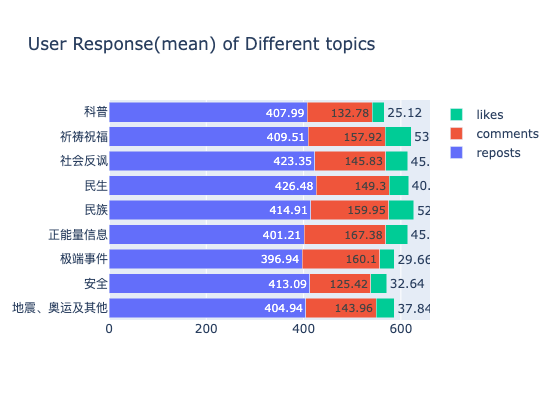

In [270]:
# 直观显示，但是没有加权平均
import plotly.graph_objects as go

post_topics =topic_response.index
reposts = topic_response['reposts']
comments = topic_response['comments']
likes = topic_response['likes']

trace1_reposts = go.Bar(y=post_topics, x=reposts, text=reposts, name='reposts', orientation='h')
trace2_comments = go.Bar(y=post_topics, x=comments, text=comments, name='comments', orientation='h')
trace3_likes = go.Bar(y=post_topics, x=likes, text=likes, name='likes', orientation='h')

layout_stack_topic_response = go.Layout(barmode='stack', height=400, width=800,title="User Response(mean) of Different topics")
figure_stack_topic_respons = go.Figure(data=[trace1_reposts, trace2_comments, trace3_likes], layout=layout_stack_topic_response)

figure_stack_topic_respons.show()


In [ ]:
# 社会反讽、民族话题、正能量信息、极端事件将进一步分析

## Q11: 账号认证类别和用户互动的关系

In [272]:
account_response = statistics_df.groupby('user_verified_type')[['reposts', 'comments', 'likes','user_followers']].mean().round(2)
account_response

reposts  comments  likes  user_followers
user_verified_type                                          
application          720.00    207.00   0.00      1809336.67
else                 353.25     84.52   9.18        43986.73
enterprise           369.84    159.44  38.44      1675300.30
government           338.33    113.61  16.56      4843790.22
medium               475.35    218.79  56.21     12385791.99
organization         443.96    219.09  40.22      8012162.48
school               310.57     70.86   5.00        82341.71
the famous user      410.67    186.98  58.45      2054439.88
unverified           405.71     93.44  25.05       514681.63
website              341.69     78.10  12.08       196534.92

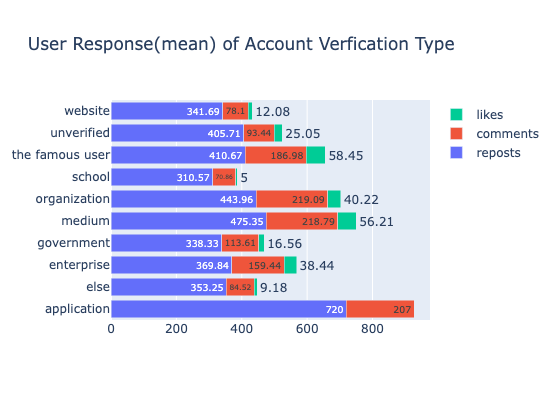

In [273]:
# 直观显示，但是没有加权平均
import plotly.graph_objects as go

user_verified_type =account_response.index
reposts = account_response['reposts']
comments = account_response['comments']
likes = account_response['likes']

trace1_reposts_account = go.Bar(y=user_verified_type, x=reposts, text=reposts, name='reposts', orientation='h')
trace2_comments_account = go.Bar(y=user_verified_type, x=comments, text=comments, name='comments', orientation='h')
trace3_likes_account = go.Bar(y=user_verified_type, x=likes, text=likes, name='likes', orientation='h')

layout_stack_account_response = go.Layout(barmode='stack', height=400, width=800,title="User Response(mean) of Account Verfication Type")
figure_stack_account_response = go.Figure(data=[trace1_reposts_account, trace2_comments_account, trace3_likes_account], layout=layout_stack_account_response)

figure_stack_account_response.show()


## Q12:Topic，内容情绪IV、互动的关系DV

In [303]:
statistics_df['Topic'].unique()

array(['极端事件', '民生', '正能量信息', '地震、奥运及其他', '祈祷祝福', '社会反讽', '民族', '安全',
       '科普'], dtype=object)

In [300]:
# 提取民族topic的所有帖文
national_df = statistics_df[statistics_df['Topic'] == '民族']
national_df

label Topic user_verified_type  user_followers  likes  comments  \
9     positive    民族         unverified           29364      0        46   
23    negative    民族         unverified          700500     13       240   
24    positive    民族         unverified             182      1        44   
30    positive    民族         unverified           41634     10       132   
32    positive    民族    the famous user          160292      3        16   
...        ...   ...                ...             ...    ...       ...   
3214  positive    民族               else             317      0        23   
3262  positive    民族               else            9689     30       212   
3264   natural    民族         unverified             130      1        42   
3281  positive    民族    the famous user          105766     69       166   
3282   natural    民族               else           11162      2        69   

      reposts  Disgust  Awe  Joy  Sadness  Fear  Surprise  Angry  \
9         166        0    2    0        1     2         0      0   
23        309        3    1    0        0     0         0      0   
24        773        1    3    0        0     0         1      0   
30        511        1    1    0        1     2         0      0   
32        117        0    2    0        0     1         1      0   
...       ...      ...  ...  ...      ...   ...       ...    ...   
3214      109        2    2    2        2     0         0      0   
3262      773        3    2    3        0     0         3      0   
3264      256        3    2    0        2     0         0      0   
3281      161        0    3    0        0     1         0      0   
3282      318        0    1    0        0     0         0      0   

      weighted_emotion_value  
9                   2.000000  
23                 -4.750000  
24                  1.750000  
30                  1.000000  
32                  6.333333  
...                      ...  
3214                0.750000  
3262                1.428571  
3264                0.000000  
3281                1.000000  
3282                0.000000  

[367 rows x 15 columns]

In [302]:
import pandas as pd
national_df = statistics_df[statistics_df['Topic'] == '民族']
national_summary = pd.DataFrame({
    'topic': ['民族'],
    'comments_sum': [national_df['comments'].sum()],
    'reposts_sum': [national_df['reposts'].sum()],
    'likes_sum': [national_df['likes'].sum()],
    # 由于帖文的情绪值有正有负，所以计算帖文情绪值的【中位数】来代表内容情绪特征
    'emotion_median': [national_df['weighted_emotion_value'].median()]
})
national_summary

topic  comments_sum  reposts_sum  likes_sum  emotion_median
0    民族         58700       152273      19091             0.0

In [309]:
import pandas as pd

# 字典列表
topics = [
    {'topic': '民族', 'comments_sum': 0, 'reposts_sum': 0, 'likes_sum': 0, 'emotion_median': 0},
    {'topic': '社会反讽', 'comments_sum': 0, 'reposts_sum': 0, 'likes_sum': 0, 'emotion_median': 0},
    {'topic': '科普', 'comments_sum': 0, 'reposts_sum': 0, 'likes_sum': 0, 'emotion_median': 0},
    {'topic': '极端事件', 'comments_sum': 0, 'reposts_sum': 0, 'likes_sum': 0, 'emotion_median': 0},
    {'topic': '正能量信息', 'comments_sum': 0, 'reposts_sum': 0, 'likes_sum': 0, 'emotion_median': 0},
    {'topic': '安全', 'comments_sum': 0, 'reposts_sum': 0, 'likes_sum': 0, 'emotion_median': 0},
    {'topic': '民生', 'comments_sum': 0, 'reposts_sum': 0, 'likes_sum': 0, 'emotion_median': 0}
]

for topic_dict in topics:
    topic = topic_dict['topic']

    topic_df = statistics_df[statistics_df['Topic'] == topic]
    
    # 由于帖文的情绪值有正有负，所以计算帖文情绪值的【中位数】来代表内容情绪特征
    topic_dict['comments_sum'] = topic_df['comments'].sum()
    topic_dict['reposts_sum'] = topic_df['reposts'].sum()
    topic_dict['likes_sum'] = topic_df['likes'].sum()
    topic_dict['emotion_median'] = topic_df['weighted_emotion_value'].median()

summary_df = pd.DataFrame(topics)
summary_df 

topic  comments_sum  reposts_sum  likes_sum  emotion_median
0     民族         58700       152273      19091        0.000000
1   社会反讽         42145       122348      13021        0.583333
2     科普         46076       141573       8715        0.750000
3   极端事件         43547       107968       8067        1.000000
4  正能量信息         57745       138416      15744        0.500000
5     安全         38379       126405       9988        0.000000
6     民生        103318       295126      28092        0.000000

In [310]:
# 选择正能量信息、极端事件、科普、社会反讽行数据，进行回归
# 回归之前要进行假设检验
# IV（topic，emotion），DV（comments，reposts，likes）

In [329]:
import pandas as pd
import statsmodels.api as sm

# 假设 statistics_df 是你的原始 DataFrame
# 以下是示例数据的结构
# statistics_df = pd.DataFrame({
#     'Topic': ['正能量信息', '极端事件', '科普', '社会反讽', ...],
#     'weighted_emotion_value': [...],
#     'comments': [...],
#     'likes': [...],
#     'reposts': [...]
# })

# 选择特定主题的行
topics_to_select = ['正能量信息', '极端事件', '科普', '社会反讽']
filtered_df = statistics_df[statistics_df['Topic'].isin(topics_to_select)]

# 将 'Topic' 转换为虚拟变量
topic_dummies = pd.get_dummies(filtered_df['Topic'], drop_first=True)

# 合并虚拟变量到原始 DataFrame
df_with_dummies = pd.concat([filtered_df, topic_dummies], axis=1)

df_with_dummies

label  Topic user_verified_type  user_followers  likes  comments  \
0      natural   极端事件         unverified          227833      0        55   
2     positive  正能量信息         unverified              66      0       466   
3     negative  正能量信息         unverified            8358      6        15   
4     positive   极端事件         unverified            1096     11        78   
8      natural   社会反讽    the famous user          104529      7        74   
...        ...    ...                ...             ...    ...       ...   
3293  positive  正能量信息    the famous user           71179     10        77   
3294  positive  正能量信息    the famous user           63782      0        23   
3296  positive   社会反讽    the famous user           60821      2        27   
3298   natural     科普         unverified          109264      0        54   
3299  negative     科普         unverified          225727      2        36   

      reposts  Disgust  Awe  Joy  Sadness  Fear  Surprise  Angry  \
0         225        2    1    0        2     1         0      0   
2         685        2    6    0        1     1         0      0   
3         120        5    0    0        1     0         0      0   
4         532        1    2    0        1     0         0      0   
8         243        0    0    0        0     0         0      0   
...       ...      ...  ...  ...      ...   ...       ...    ...   
3293      267        0    3    0        2     0         0      0   
3294      102        0    1    1        0     0         0      0   
3296      266        2    1    0        0     0         0      0   
3298      144        0    0    0        1     1         0      0   
3299      191        7    2    0        0     1         0      0   

      weighted_emotion_value  正能量信息   社会反讽     科普  
0                       0.00  False  False  False  
2                       1.00   True  False  False  
3                      -5.80   True  False  False  
4                       2.25  False  False  False  
8                       0.00  False   True  False  
...                      ...    ...    ...    ...  
3293                    2.60   True  False  False  
3294                    6.00   True  False  False  
3296                    1.50  False   True  False  
3298                    0.00  False  False   True  
3299                   -1.50  False  False   True  

[1253 rows x 18 columns]

In [322]:
import pandas as pd
from scipy import stats
selected_rows = statistics_df[(statistics_df['Topic'] == '正能量信息') | 
                              (statistics_df['Topic'] == '极端事件') | 
                              (statistics_df['Topic'] == '科普') | 
                              (statistics_df['Topic'] == '社会反讽')]

# 创建独热编码
dummy_variables = pd.get_dummies(selected_rows['Topic'], prefix='Topic')
dummy_variables 

Topic_极端事件  Topic_正能量信息  Topic_社会反讽  Topic_科普
0           True        False       False     False
2          False         True       False     False
3          False         True       False     False
4           True        False       False     False
8          False        False        True     False
...          ...          ...         ...       ...
3293       False         True       False     False
3294       False         True       False     False
3296       False        False        True     False
3298       False        False       False      True
3299       False        False       False      True

[1253 rows x 4 columns]

In [314]:
# 选择 sample
selected_rows = statistics_df[statistics_df['Topic'].isin(['正能量信息', '极端事件', '科普', '社会反讽'])]
# 提取所需的自变量和因变量
X = selected_rows[['Topic', 'weighted_emotion_value']]
y_comments = selected_rows['comments']
y_likes = selected_rows['likes']
y_reposts = selected_rows['reposts']


## Q13：认证账户类型与谣言发布数量

In [307]:
veri_topic_ev['verification'].unique()

array(['unverified', 'else', 'the famous user', 'website', 'enterprise',
       'organization', 'government', 'medium', 'school', 'application'],
      dtype=object)

In [161]:
import pandas as pd
from scipy.stats import f_oneway

sample_topic_response = {
    'topic': statistics_df["Topic"],
    'reposts': statistics_df["reposts"],
    'likes': statistics_df["likes"],
    'comments':statistics_df["comments"]
}

sample_topic_response_df = pd.DataFrame(sample_topic_response)

response_types = ['reposts', 'likes', 'comments']
anova_results = []

for response_type in response_types:
    f_statistic, p_value = f_oneway(*[sample_topic_response_df[response_type][sample_topic_response_df['topic'] == topic] for topic in sample_topic_response['topic']])
    anova_results.append({'response_type': response_type, 'f_statistic': f_statistic, 'p_value': p_value})

anova_results_df = pd.DataFrame(anova_results)

## （未）Q14:账号认证类型以及发布内容的topic、情绪偏好，回归分析

In [288]:
# 由于帖文的情绪值有正有负，所以计算某账号所有帖文情绪值的中位数来代表改账号的内容情绪特征
import statistics

account_emotion = statistics_df.groupby('user_verified_type')[['weighted_emotion_value']].median()
account_emotion


weighted_emotion_value
user_verified_type                        
application                       3.500000
else                              0.000000
enterprise                        0.196429
government                        1.416667
medium                            0.375000
organization                      2.500000
school                            0.000000
the famous user                   0.316667
unverified                        0.000000
website                           0.000000

## （未）信息的特征，text，pic,url

## （未）最有影响力的账号